## Skin Cancer Classification | Transfer Learning | XAI

#### Load image dataset


This python files set the path for the folders where train and test images are stored, inspect the data (i.e. number of images), create dataframe using path to each image and theor labels.

In [2]:
%pip install scikit-plot tensorflow-hub tensorflow-addons vit-keras tf-keras-vis lime

  Using cached tensorflow-2.19.0-cp39-cp39-win_amd64.whl.metadata (4.1 kB)
  Using cached protobuf-5.29.4-cp39-cp39-win_amd64.whl.metadata (592 bytes)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.1-py3-none-any.whl.metadata (6.1 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached contourpy-1.2.1-cp39-cp39-win_amd64.whl.metadata (5.8 kB)
  Using cached contourpy-1.2.0-cp39-cp39-win_amd64.whl.metadata (5.8 kB)
  Using cached contourpy-1.1.1-cp39-cp39-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.1.0-cp39-cp39-win_amd64.whl.metadata (5.7 kB)
  Using cached contourpy-1.0.7-cp39-cp39-win_amd64.whl.metadata (3.9 kB)
  Using cached contourpy-1.0.6-cp39-cp39-win_amd64.whl.metadata (3.5 kB)
INFO: pip is still looking at multiple versions of tensorflo

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.10.0 requires keras<2.11,>=2.10.0, but you have keras 3.9.1 which is incompatible.
tensorflow-gpu 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.6 which is incompatible.
tensorflow-gpu 2.10.0 requires tensorboard<2.11,>=2.10, but you have tensorboard 2.17.1 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip install scipy==1.9.3


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Install compatible versions of TensorFlow and Keras
%pip install tensorflow==2.10.0 keras==2.10.0

# Import required packages
import os
import glob
import random
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, Sequential
from vit_keras import vit
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from skimage.transform import resize

from lime import lime_image
from skimage.segmentation import mark_boundaries
from tf_keras_vis.gradcam import GradcamPlusPlus
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
os.makedirs('results', exist_ok=True)  # Ensure results folder exists

  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl.metadata (3.1 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl.metadata (807 bytes)
  Using cached tensorboard-2.10.1-py3-none-any.whl.metadata (1.9 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Attempting uninstall: keras
    Found existing installation: keras 3.9.1
    Uninstalling keras-3.9.1:
      Successfully uninstalled keras-3.9.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfu

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.38.0 requires protobuf<6,>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.17.1 requires keras>=3.2.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.17.1 requires tensorboard<2.18,>=2.17, but you have tensorboard 2.10.1 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.10.0 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

Tenso

In [4]:
# Define the path to dataset - data is stored in folder named data/train and data/test
# In case running on local system, you can define path to the folder where data is stored
path_train = 'data/train'
path_test = 'data/test'

In [5]:
train_images = glob.glob(f"{path_train}/**/*.jpg", recursive=True)
test_images = glob.glob(f"{path_test}/**/*.jpg", recursive=True)


In [6]:
# Check the size of training and testing data(images)
train_samples = len(train_images)
test_samples = len(test_images)

print(f'train samples count: {train_samples}')
print(f'test samples count: {test_samples}')

train samples count: 2637
test samples count: 660


In [7]:
# Create dataframe to store path to each image along with label

# generate labels

train_labels = [os.path.basename(os.path.dirname(_)) for _ in train_images]
test_labels = [os.path.basename(os.path.dirname(_)) for _ in test_images]



train_df = pd.DataFrame({
    'image_path': train_images,
    'label': train_labels
})

test_df = pd.DataFrame({
    'image_path': test_images,
    'label': test_labels
})

# Generate encoded labels malignant - 1, benign - 0
train_df['label_encoded'] = train_df.apply(lambda row: 1 if row.label == 'malignant' else 0, axis=1)
test_df['label_encoded'] = test_df.apply(lambda row: 1 if row.label == 'malignant' else 0, axis=1)

### EDA

Thia code is used for some basic EDA on training and testing data
 - check class balance in both training and testing data
 - view sample training images of both classes

In [8]:
#class balance check train & test
train_class_count = train_df['label'].value_counts()
test_class_count = test_df['label'].value_counts()
print("Class distribution in training set:")

print(f"train_class_count: {train_class_count}")
print(f"test_class_count: {test_class_count}")

Class distribution in training set:
train_class_count: label
benign       1440
malignant    1197
Name: count, dtype: int64
test_class_count: label
benign       360
malignant    300
Name: count, dtype: int64


C:\Users\ishan\AppData\Local\Temp\ipykernel_26468\2376982423.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_class_count.index, y=train_class_count.values,
C:\Users\ishan\AppData\Local\Temp\ipykernel_26468\2376982423.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_class_count.index, y=test_class_count.values,


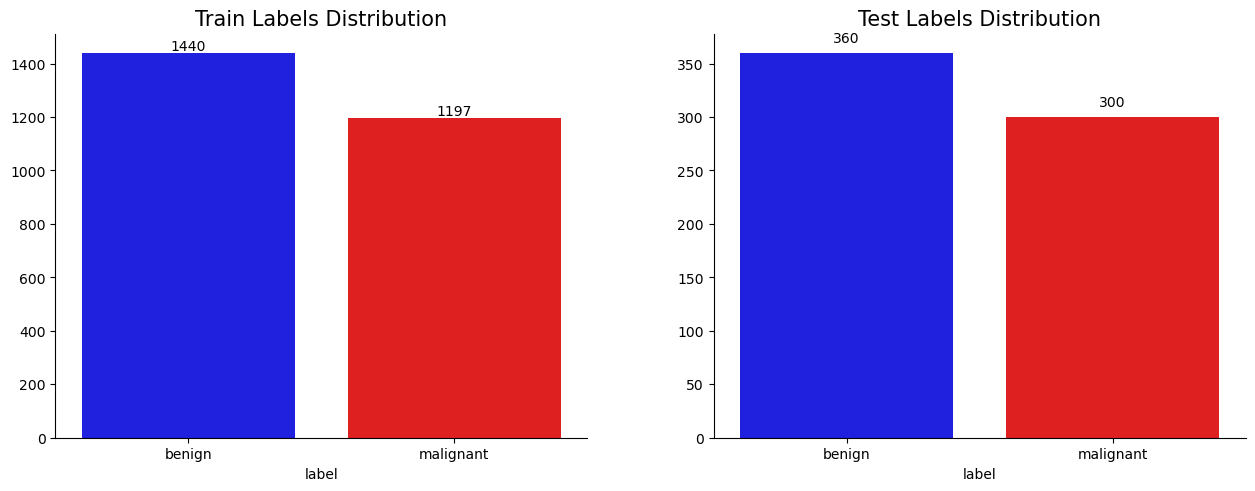

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Color map for each class
color_mapping = {'malignant': 'red', 'benign': 'blue'}

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.tight_layout(pad=6.0)

# Plot Train
ax1.set_title('Train Labels Distribution', fontsize=15)
sns.barplot(x=train_class_count.index, y=train_class_count.values,
            palette=[color_mapping.get(lbl, 'gray') for lbl in train_class_count.index],
            ax=ax1)

# Plot Test
ax2.set_title('Test Labels Distribution', fontsize=15)
sns.barplot(x=test_class_count.index, y=test_class_count.values,
            palette=[color_mapping.get(lbl, 'gray') for lbl in test_class_count.index],
            ax=ax2)

# Add value labels
for ax, counts in zip([ax1, ax2], [train_class_count, test_class_count]):
    for i, val in enumerate(counts.values):
        ax.text(i, val + 10, str(val), ha='center', fontsize=10)

sns.despine()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


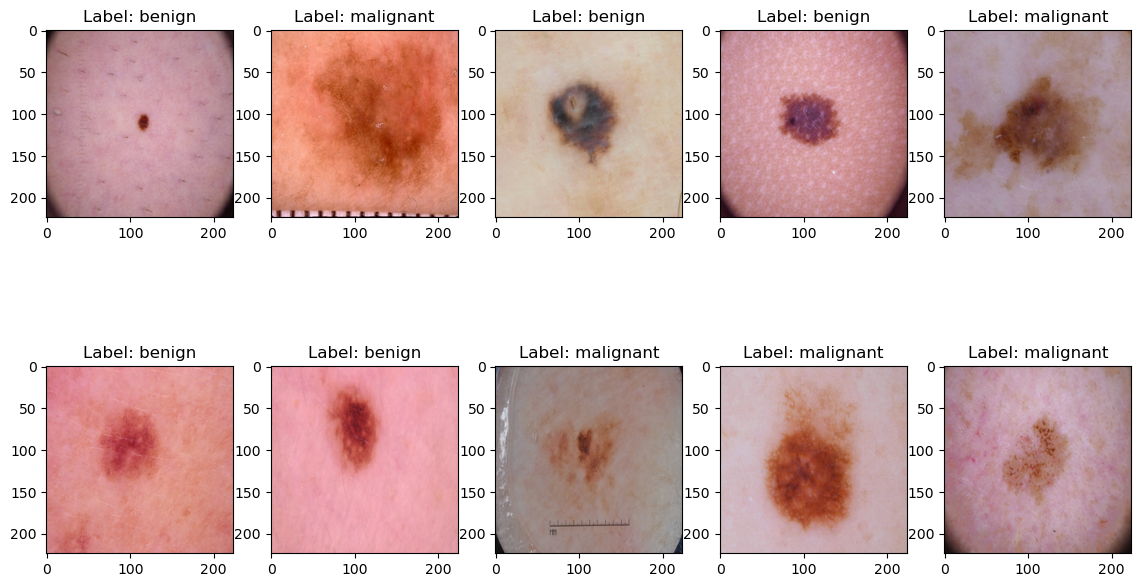

In [10]:
# View sample training images from both the classes
def load_image(image_path):

    # Read and decode an image file to a uint8 tensor
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels=3)

    # Resize image
    image = tf.image.resize(image, [224, 224],
                            method = tf.image.ResizeMethod.LANCZOS3)

    # Convert image dtype to float32 and NORMALIZE!!!
    image = tf.cast(image, tf.float32)/255.

    # Return image
    return image

idx = random.sample(train_df.index.to_list(), 10)
fig = plt.figure(figsize=(14,8))

for id, _ in enumerate(idx):

    plt.subplot(2, 5, id+1)
    plt.title(f'Label: {train_df.label[_]}')
    plt.imshow(load_image(train_df.image_path[_]))

### Pre-processing data

This code performes few pre-processing steps on training & testing data like:
- split training into train-validation split
- add custom augmengtation layer(can be replaced with ImageDataGenerator) - here data is preety much balanced already so no need to do higher augmentation, only randomflip & randomzoom is performed.
- prepare tensor dataset and batches using tensorfloe.data.Dataset to fit in the training data


In [11]:
# Split the training data into train-validation set
train_idx, val_ind, _, _ = train_test_split(train_df.index, train_df.label_encoded, test_size = 0.20,
                                            stratify = train_df.label_encoded, random_state = 42)

# Get training and validation data
train_new_df = train_df.iloc[train_idx].reset_index(drop=True)
val_df = train_df.iloc[val_ind].reset_index(drop=True)

# View shapes
print(f"training size: {train_new_df.shape}, validation size: {val_df.shape}")

training size: (2109, 3), validation size: (528, 3)


In [12]:
# Check class balance in both trainng and validation set
train_class_count = train_new_df['label'].value_counts()
val_class_count = val_df['label'].value_counts()

print(f"train_class_count: {train_class_count}")
print(f"test_class_count: {val_class_count}")

train_class_count: label
benign       1152
malignant     957
Name: count, dtype: int64
test_class_count: label
benign       288
malignant    240
Name: count, dtype: int64


In [13]:
# Build custome augmentation layer
augmentation_layer = Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical', seed = 42),
    layers.RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1), seed = 42),
], name='augmentation_layer')

In [14]:
# Define function to build tensor batched dataset
def pre_processing(orig_df, augmentation = False):

    # Get image paths and labels from DataFrame
    image_paths = orig_df.image_path
    image_labels = tf.one_hot(orig_df.label_encoded, depth = 2).numpy()

    # create tensor dataset from original data
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, image_labels))

    # apply augmentation layer to the data
    if augmentation:
          dataset = dataset.map(lambda x, y: (augmentation_layer(load_image(x)), y), num_parallel_calls = tf.data.AUTOTUNE)
    else:
          dataset = dataset.map(lambda x, y: (load_image(x), y), num_parallel_calls = tf.data.AUTOTUNE)

    # apply batching
    dataset = dataset.batch(32)

    return dataset

In [15]:
# Generate tensor datasets for train, validation(no augmentation) and test(no augmentation)
train_dataset = pre_processing(train_new_df, augmentation = True)

val_dataset = pre_processing(val_df)

test_dataset = pre_processing(test_df)

In [16]:
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

### Vision Transformer

This code builds and train Transfer Learning-enhanced version of Vision Transformer(ViT) model from vit-keras, check validation and test accuracy and other performance parameters

In [22]:
# Load the Vision Transformer Model model
vit_model_16 = vit.vit_b16(image_size = 224, activation = 'sigmoid', pretrained = True, include_top = False, pretrained_top = False, classes = 2)

# Freeze model layers for inference-mode only
for layer in vit_model_16.layers:
    layer.trainable = False

c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\vit_keras\utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


In [ ]:

def vit_b16_model():

    vit_model_sequential = Sequential([
        layers.Input(shape = (224, 224, 3), dtype = tf.float32, name = 'input_image'),
        vit_model_16,
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, dtype=tf.float32, activation='sigmoid')], name='vit_b16_sequential_model')

    tf.random.set_seed(42)

    # Compile the model
    vit_model_sequential.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                                  metrics = "accuracy")

    return vit_model_sequential

In [24]:
# initialize model
vit_model = vit_b16_model()

print(vit_model.summary())

Model: "vit_b16_sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b16 (Functional)        (None, 768)               85798656  
                                                                 
 dropout_1 (Dropout)         (None, 768)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               98432     
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 85,897,346
Trainable params: 98,690
Non-trainable params: 85,798,656
_________________________________________________________________
None


In [25]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

Num GPUs Available: 1


In [26]:
# train model with training data
vit_training = vit_model.fit(train_dataset, epochs = 50, validation_data = val_dataset, validation_steps = int(len(val_dataset)),
                             callbacks = early_stopping)

vit_model.save("vit_model_skin_cancer.h5")


Epoch 1/50
66/66 [==============================] - 46s 536ms/step - loss: 0.4381 - accuracy: 0.7961 - val_loss: 0.3057 - val_accuracy: 0.8561
Epoch 2/50
66/66 [==============================] - 32s 484ms/step - loss: 0.3363 - accuracy: 0.8487 - val_loss: 0.2639 - val_accuracy: 0.8769
Epoch 3/50
66/66 [==============================] - 32s 485ms/step - loss: 0.3242 - accuracy: 0.8511 - val_loss: 0.2575 - val_accuracy: 0.8731
Epoch 4/50
66/66 [==============================] - 32s 485ms/step - loss: 0.2929 - accuracy: 0.8677 - val_loss: 0.2421 - val_accuracy: 0.8864
Epoch 5/50
66/66 [==============================] - 32s 479ms/step - loss: 0.2811 - accuracy: 0.8701 - val_loss: 0.2427 - val_accuracy: 0.8883
Epoch 6/50
66/66 [==============================] - 32s 486ms/step - loss: 0.2789 - accuracy: 0.8734 - val_loss: 0.2358 - val_accuracy: 0.8826
Epoch 7/50
66/66 [==============================] - 32s 485ms/step - loss: 0.2683 - accuracy: 0.8715 - val_loss: 0.2329 - val_accuracy: 0.8845

In [27]:
# Evaluate the model on test dataframe
vit_evaluation = vit_model.evaluate(test_dataset)

21/21 [==============================] - 7s 327ms/step - loss: 0.2879 - accuracy: 0.8667


In [28]:
# Generate model probabilities and associated predictions
vit_test_prob = vit_model.predict(test_dataset, verbose=1)
vit_test_pred = tf.argmax(vit_test_prob, axis=1)

21/21 [==============================] - 9s 321ms/step


C:\Users\ishan\AppData\Local\Temp\ipykernel_26468\2245378089.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt1.show()


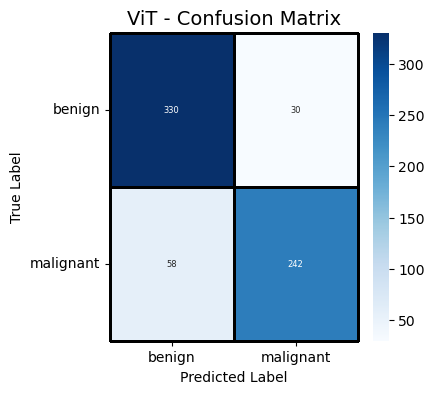

In [29]:
# generate & plot confusion matrics to check False positives & False negatuves
vit_confusion_matrix = confusion_matrix(test_df.label_encoded, vit_test_pred)

# Set plot size
plt1 = plt.figure(figsize = (4, 4))

# Create confusion matrix heatmap
disp = sns.heatmap(vit_confusion_matrix, annot = True, cmap = 'Blues',
                   annot_kws={"size": 6}, fmt='g',
                   linewidths=1, linecolor='black', clip_on=False,
                   xticklabels = ['benign', 'malignant'], yticklabels = ['benign', 'malignant'])

# Set title and axis labels
disp.set_title('ViT - Confusion Matrix', fontsize = 14)
disp.set_xlabel('Predicted Label', fontsize = 10)
disp.set_ylabel('True Label', fontsize = 10)
plt.yticks(rotation=0)

# Plot confusion matrix
plt1.savefig("C:/Users/ishan/OneDrive/Desktop/CV+PDL Miniproject/ViT_CM.pdf")
plt1.show()

In [30]:
print("Classification Report:")
print(classification_report(test_df.label_encoded, vit_test_pred, target_names=["Benign", "Malignant"]))

Classification Report:
              precision    recall  f1-score   support

      Benign       0.85      0.92      0.88       360
   Malignant       0.89      0.81      0.85       300

    accuracy                           0.87       660
   macro avg       0.87      0.86      0.86       660
weighted avg       0.87      0.87      0.87       660



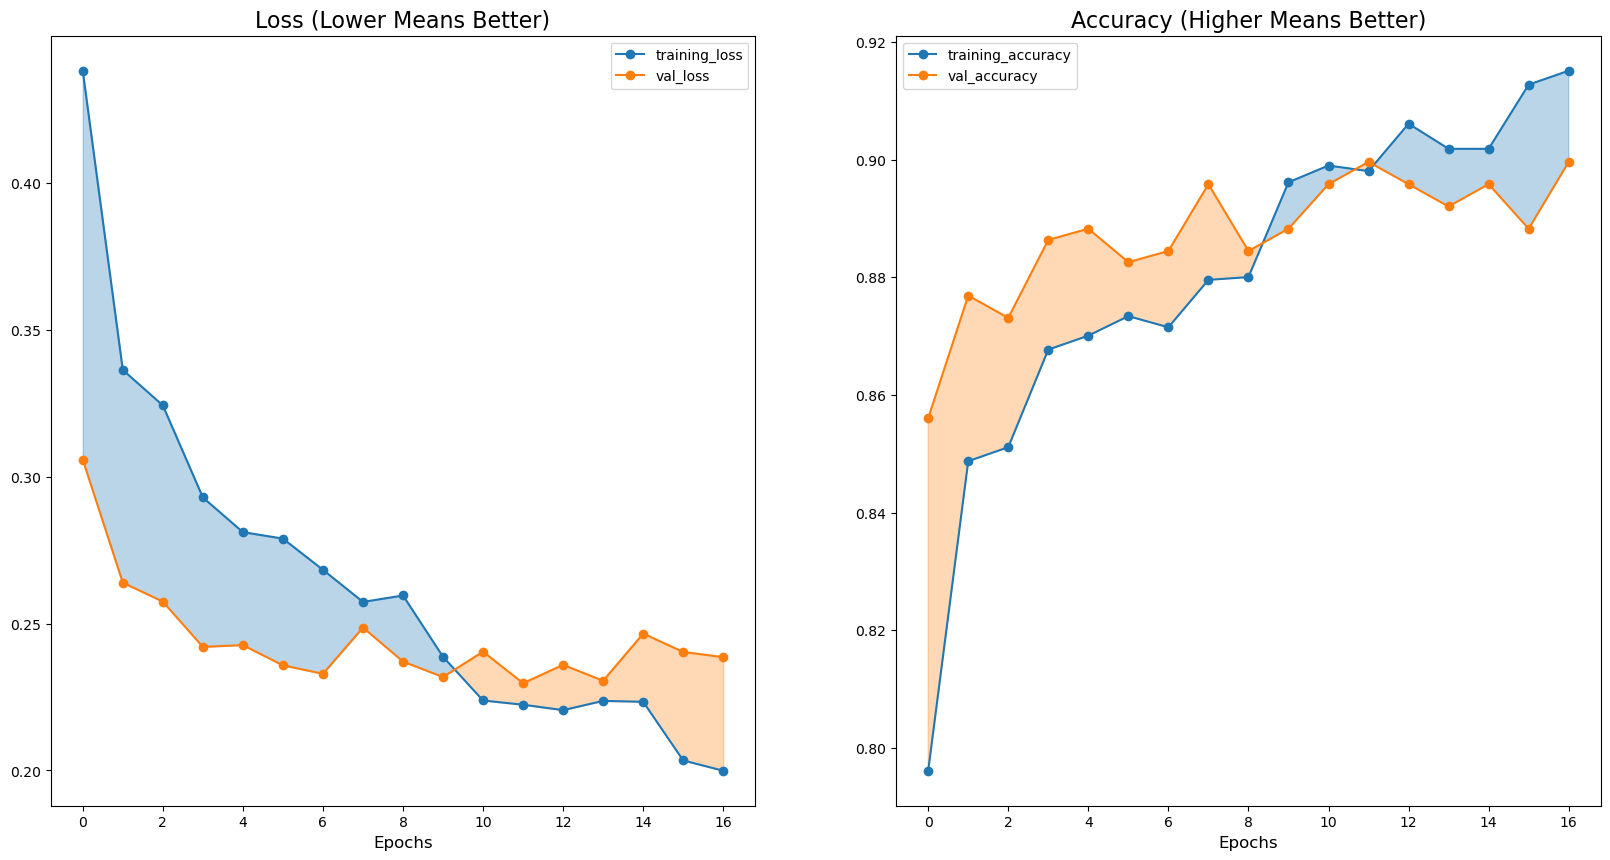

In [31]:
# Ploting train - validation Accuracy and loss curves and ROC curve
train_loss = np.array(vit_training.history['loss'])
val_loss = np.array(vit_training.history['val_loss'])

train_accuracy = np.array(vit_training.history['accuracy'])
val_accuracy = np.array(vit_training.history['val_accuracy'])

epochs = range(len(vit_training.history['loss']))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot loss
ax1.plot(epochs, train_loss, label='training_loss', marker='o')
ax1.plot(epochs, val_loss, label='val_loss', marker='o')

ax1.fill_between(epochs, train_loss, val_loss, where=(train_loss > val_loss), color='C0', alpha=0.3, interpolate=True)
ax1.fill_between(epochs, train_loss, val_loss, where=(train_loss < val_loss), color='C1', alpha=0.3, interpolate=True)

ax1.set_title('Loss (Lower Means Better)', fontsize=16)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.legend()

# Plot accuracy
ax2.plot(epochs, train_accuracy, label='training_accuracy', marker='o')
ax2.plot(epochs, val_accuracy, label='val_accuracy', marker='o')

ax2.fill_between(epochs, train_accuracy, val_accuracy, where=(train_accuracy > val_accuracy), color='C0', alpha=0.3, interpolate=True)
ax2.fill_between(epochs, train_accuracy, val_accuracy, where=(train_accuracy < val_accuracy), color='C1', alpha=0.3, interpolate=True)

ax2.set_title('Accuracy (Higher Means Better)', fontsize=16)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.legend();

In [ ]:
# ViT classification report
print(classification_report(test_df.label_encoded,
                            vit_test_pred,
                            target_names=["Benign", "Malignant"]))

              precision    recall  f1-score   support

      Benign       0.84      0.91      0.87       360
   Malignant       0.88      0.80      0.84       300

    accuracy                           0.86       660
   macro avg       0.86      0.85      0.85       660
weighted avg       0.86      0.86      0.86       660



## XAI

### LIME

In [33]:
# Sample 5 from each class
class0 = test_df[test_df['label_encoded'] == 0].sample(5, random_state = 10)
class1 = test_df[test_df['label_encoded'] == 1].sample(5, random_state = 10)
sampled_df = pd.concat([class0, class1])

# Create dataset from the sampled DataFrame
sampled_dataset = pre_processing(sampled_df, augmentation=False)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 407ms/step


  1%|          | 10/1000 [00:00<00:47, 20.92it/s]

1/1 [==============================] - 0s 160ms/step


  2%|▏         | 20/1000 [00:00<00:31, 30.97it/s]

1/1 [==============================] - 0s 119ms/step


  3%|▎         | 30/1000 [00:00<00:24, 39.23it/s]

1/1 [==============================] - 0s 111ms/step


  4%|▍         | 40/1000 [00:01<00:21, 45.62it/s]

1/1 [==============================] - 0s 113ms/step


  5%|▌         | 50/1000 [00:01<00:18, 50.14it/s]

1/1 [==============================] - 0s 117ms/step


  6%|▌         | 60/1000 [00:01<00:17, 52.49it/s]

1/1 [==============================] - 0s 107ms/step


  7%|▋         | 70/1000 [00:01<00:16, 54.98it/s]

1/1 [==============================] - 0s 111ms/step


  8%|▊         | 80/1000 [00:01<00:16, 56.63it/s]

1/1 [==============================] - 0s 110ms/step


  9%|▉         | 90/1000 [00:01<00:15, 57.89it/s]

1/1 [==============================] - 0s 110ms/step


 10%|█         | 100/1000 [00:02<00:15, 58.44it/s]

1/1 [==============================] - 0s 115ms/step


 11%|█         | 110/1000 [00:02<00:15, 57.91it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█▏        | 120/1000 [00:02<00:14, 59.36it/s]

1/1 [==============================] - 0s 111ms/step


 13%|█▎        | 130/1000 [00:02<00:14, 59.31it/s]

1/1 [==============================] - 0s 121ms/step


 14%|█▍        | 140/1000 [00:02<00:14, 58.22it/s]

1/1 [==============================] - 0s 111ms/step


 15%|█▌        | 150/1000 [00:02<00:14, 58.81it/s]

1/1 [==============================] - 0s 109ms/step


 16%|█▌        | 160/1000 [00:03<00:14, 58.92it/s]

1/1 [==============================] - 0s 110ms/step


 17%|█▋        | 170/1000 [00:03<00:13, 59.63it/s]

1/1 [==============================] - 0s 110ms/step


 18%|█▊        | 180/1000 [00:03<00:13, 60.20it/s]

1/1 [==============================] - 0s 114ms/step


 19%|█▉        | 190/1000 [00:03<00:13, 59.60it/s]

1/1 [==============================] - 0s 115ms/step


 20%|██        | 200/1000 [00:03<00:13, 59.37it/s]

1/1 [==============================] - 0s 111ms/step


 21%|██        | 210/1000 [00:03<00:13, 58.84it/s]

1/1 [==============================] - 0s 107ms/step


 22%|██▏       | 220/1000 [00:04<00:13, 59.73it/s]

1/1 [==============================] - 0s 111ms/step


 23%|██▎       | 230/1000 [00:04<00:12, 59.83it/s]

1/1 [==============================] - 0s 110ms/step


 24%|██▍       | 240/1000 [00:04<00:12, 60.27it/s]

1/1 [==============================] - 0s 109ms/step


 25%|██▌       | 250/1000 [00:04<00:12, 59.60it/s]

1/1 [==============================] - 0s 107ms/step


 26%|██▌       | 260/1000 [00:04<00:12, 60.43it/s]

1/1 [==============================] - 0s 108ms/step


 27%|██▋       | 270/1000 [00:04<00:11, 61.05it/s]

1/1 [==============================] - 0s 111ms/step


 28%|██▊       | 280/1000 [00:05<00:11, 60.80it/s]

1/1 [==============================] - 0s 108ms/step


 29%|██▉       | 290/1000 [00:05<00:11, 61.02it/s]

1/1 [==============================] - 0s 111ms/step


 30%|███       | 300/1000 [00:05<00:11, 60.03it/s]

1/1 [==============================] - 0s 119ms/step


 31%|███       | 310/1000 [00:05<00:11, 59.07it/s]

1/1 [==============================] - 0s 111ms/step


 32%|███▏      | 320/1000 [00:05<00:11, 60.04it/s]

1/1 [==============================] - 0s 137ms/step


 33%|███▎      | 330/1000 [00:05<00:11, 57.61it/s]

1/1 [==============================] - 0s 111ms/step


 34%|███▍      | 340/1000 [00:06<00:11, 58.70it/s]

1/1 [==============================] - 0s 116ms/step


 35%|███▌      | 350/1000 [00:06<00:11, 57.54it/s]

1/1 [==============================] - 0s 109ms/step


 36%|███▌      | 360/1000 [00:06<00:10, 58.75it/s]

1/1 [==============================] - 0s 113ms/step


 37%|███▋      | 370/1000 [00:06<00:10, 58.59it/s]

1/1 [==============================] - 0s 110ms/step


 38%|███▊      | 380/1000 [00:06<00:10, 59.24it/s]

1/1 [==============================] - 0s 125ms/step


 39%|███▉      | 390/1000 [00:06<00:10, 57.99it/s]

1/1 [==============================] - 0s 109ms/step


 40%|████      | 400/1000 [00:07<00:10, 58.66it/s]

1/1 [==============================] - 0s 117ms/step


 41%|████      | 410/1000 [00:07<00:10, 57.77it/s]

1/1 [==============================] - 0s 115ms/step


 42%|████▏     | 420/1000 [00:07<00:10, 57.41it/s]

1/1 [==============================] - 0s 153ms/step


 43%|████▎     | 430/1000 [00:07<00:10, 54.08it/s]

1/1 [==============================] - 0s 122ms/step


 44%|████▍     | 440/1000 [00:07<00:10, 53.51it/s]

1/1 [==============================] - 0s 116ms/step


 45%|████▌     | 450/1000 [00:08<00:10, 54.98it/s]

1/1 [==============================] - 0s 108ms/step


 46%|████▌     | 460/1000 [00:08<00:09, 56.76it/s]

1/1 [==============================] - 0s 107ms/step


 47%|████▋     | 470/1000 [00:08<00:09, 58.18it/s]

1/1 [==============================] - 0s 110ms/step


 48%|████▊     | 480/1000 [00:08<00:08, 58.94it/s]

1/1 [==============================] - 0s 108ms/step


 49%|████▉     | 490/1000 [00:08<00:08, 59.32it/s]

1/1 [==============================] - 0s 115ms/step


 50%|█████     | 500/1000 [00:08<00:08, 58.47it/s]

1/1 [==============================] - 0s 109ms/step


 51%|█████     | 510/1000 [00:09<00:08, 59.46it/s]

1/1 [==============================] - 0s 108ms/step


 52%|█████▏    | 520/1000 [00:09<00:07, 60.19it/s]

1/1 [==============================] - 0s 107ms/step


 53%|█████▎    | 530/1000 [00:09<00:07, 60.46it/s]

1/1 [==============================] - 0s 104ms/step


 54%|█████▍    | 540/1000 [00:09<00:07, 60.70it/s]

1/1 [==============================] - 0s 109ms/step


 55%|█████▌    | 550/1000 [00:09<00:07, 61.39it/s]

1/1 [==============================] - 0s 106ms/step


 56%|█████▌    | 560/1000 [00:09<00:07, 61.92it/s]

1/1 [==============================] - 0s 111ms/step


 57%|█████▋    | 570/1000 [00:09<00:07, 61.36it/s]

1/1 [==============================] - 0s 113ms/step


 58%|█████▊    | 580/1000 [00:10<00:06, 60.81it/s]

1/1 [==============================] - 0s 120ms/step


 59%|█████▉    | 590/1000 [00:10<00:06, 59.66it/s]

1/1 [==============================] - 0s 119ms/step


 60%|██████    | 600/1000 [00:10<00:06, 57.95it/s]

1/1 [==============================] - 0s 116ms/step


 61%|██████    | 610/1000 [00:10<00:06, 58.74it/s]

1/1 [==============================] - 0s 110ms/step


 62%|██████▏   | 620/1000 [00:10<00:06, 59.39it/s]

1/1 [==============================] - 0s 105ms/step


 63%|██████▎   | 630/1000 [00:11<00:06, 59.53it/s]

1/1 [==============================] - 0s 113ms/step


 64%|██████▍   | 640/1000 [00:11<00:06, 59.52it/s]

1/1 [==============================] - 0s 125ms/step


 65%|██████▌   | 650/1000 [00:11<00:05, 58.40it/s]

1/1 [==============================] - 0s 110ms/step


 66%|██████▌   | 660/1000 [00:11<00:05, 59.30it/s]

1/1 [==============================] - 0s 191ms/step


 67%|██████▋   | 670/1000 [00:11<00:06, 52.10it/s]

1/1 [==============================] - 0s 153ms/step


 68%|██████▊   | 680/1000 [00:11<00:06, 51.18it/s]

1/1 [==============================] - 0s 110ms/step


 69%|██████▉   | 690/1000 [00:12<00:05, 53.90it/s]

1/1 [==============================] - 0s 115ms/step


 70%|███████   | 700/1000 [00:12<00:05, 53.65it/s]

1/1 [==============================] - 0s 110ms/step


 71%|███████   | 710/1000 [00:12<00:05, 55.65it/s]

1/1 [==============================] - 0s 117ms/step


 72%|███████▏  | 720/1000 [00:12<00:04, 56.82it/s]

1/1 [==============================] - 0s 111ms/step


 73%|███████▎  | 730/1000 [00:12<00:04, 57.22it/s]

1/1 [==============================] - 0s 109ms/step


 74%|███████▍  | 740/1000 [00:12<00:04, 58.31it/s]

1/1 [==============================] - 0s 109ms/step


 75%|███████▌  | 750/1000 [00:13<00:04, 59.20it/s]

1/1 [==============================] - 0s 109ms/step


 76%|███████▌  | 760/1000 [00:13<00:04, 59.61it/s]

1/1 [==============================] - 0s 114ms/step


 77%|███████▋  | 770/1000 [00:13<00:03, 59.63it/s]

1/1 [==============================] - 0s 108ms/step


 78%|███████▊  | 780/1000 [00:13<00:03, 60.13it/s]

1/1 [==============================] - 0s 108ms/step


 79%|███████▉  | 790/1000 [00:13<00:03, 60.69it/s]

1/1 [==============================] - 0s 111ms/step


 80%|████████  | 800/1000 [00:13<00:03, 59.01it/s]

1/1 [==============================] - 0s 107ms/step


 81%|████████  | 810/1000 [00:14<00:03, 59.87it/s]

1/1 [==============================] - 0s 107ms/step


 82%|████████▏ | 820/1000 [00:14<00:03, 59.89it/s]

1/1 [==============================] - 0s 108ms/step


 83%|████████▎ | 830/1000 [00:14<00:02, 60.54it/s]

1/1 [==============================] - 0s 115ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 60.08it/s]

1/1 [==============================] - 0s 108ms/step


 85%|████████▌ | 850/1000 [00:14<00:02, 60.62it/s]

1/1 [==============================] - 0s 112ms/step


 86%|████████▌ | 860/1000 [00:14<00:02, 59.61it/s]

1/1 [==============================] - 0s 108ms/step


 87%|████████▋ | 870/1000 [00:15<00:02, 59.88it/s]

1/1 [==============================] - 0s 107ms/step


 88%|████████▊ | 880/1000 [00:15<00:01, 60.45it/s]

1/1 [==============================] - 0s 114ms/step


 89%|████████▉ | 890/1000 [00:15<00:01, 60.17it/s]

1/1 [==============================] - 0s 113ms/step


 90%|█████████ | 900/1000 [00:15<00:01, 58.27it/s]

1/1 [==============================] - 0s 108ms/step


 91%|█████████ | 910/1000 [00:15<00:01, 59.44it/s]

1/1 [==============================] - 0s 222ms/step


 92%|█████████▏| 920/1000 [00:16<00:01, 49.36it/s]

1/1 [==============================] - 0s 108ms/step


 93%|█████████▎| 930/1000 [00:16<00:01, 52.42it/s]

1/1 [==============================] - 0s 106ms/step


 94%|█████████▍| 940/1000 [00:16<00:01, 55.24it/s]

1/1 [==============================] - 0s 109ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 56.93it/s]

1/1 [==============================] - 0s 109ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 57.67it/s]

1/1 [==============================] - 0s 108ms/step


 97%|█████████▋| 970/1000 [00:16<00:00, 58.61it/s]

1/1 [==============================] - 0s 115ms/step


 98%|█████████▊| 980/1000 [00:17<00:00, 58.70it/s]

1/1 [==============================] - 0s 105ms/step


 99%|█████████▉| 990/1000 [00:17<00:00, 60.09it/s]

1/1 [==============================] - 0s 112ms/step


100%|██████████| 1000/1000 [00:17<00:00, 57.41it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 49ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 111ms/step


  1%|          | 10/1000 [00:00<00:16, 59.43it/s]

1/1 [==============================] - 0s 113ms/step


  2%|▏         | 20/1000 [00:00<00:16, 59.48it/s]

1/1 [==============================] - 0s 116ms/step


  3%|▎         | 30/1000 [00:00<00:16, 58.38it/s]

1/1 [==============================] - 0s 110ms/step


  4%|▍         | 40/1000 [00:00<00:16, 59.40it/s]

1/1 [==============================] - 0s 107ms/step


  5%|▌         | 50/1000 [00:00<00:15, 60.43it/s]

1/1 [==============================] - 0s 111ms/step


  6%|▌         | 60/1000 [00:00<00:15, 60.74it/s]

1/1 [==============================] - 0s 107ms/step


  7%|▋         | 70/1000 [00:01<00:15, 61.40it/s]

1/1 [==============================] - 0s 114ms/step


  8%|▊         | 80/1000 [00:01<00:15, 60.35it/s]

1/1 [==============================] - 0s 107ms/step


  9%|▉         | 90/1000 [00:01<00:14, 61.22it/s]

1/1 [==============================] - 0s 110ms/step


 10%|█         | 100/1000 [00:01<00:14, 61.25it/s]

1/1 [==============================] - 0s 109ms/step


 11%|█         | 110/1000 [00:01<00:14, 60.65it/s]

1/1 [==============================] - 0s 111ms/step


 12%|█▏        | 120/1000 [00:01<00:14, 59.21it/s]

1/1 [==============================] - 0s 148ms/step


 13%|█▎        | 130/1000 [00:02<00:15, 56.07it/s]

1/1 [==============================] - 0s 107ms/step


 14%|█▍        | 140/1000 [00:02<00:14, 58.19it/s]

1/1 [==============================] - 0s 115ms/step


 15%|█▌        | 150/1000 [00:02<00:14, 58.83it/s]

1/1 [==============================] - 0s 111ms/step


 16%|█▌        | 160/1000 [00:02<00:14, 58.27it/s]

1/1 [==============================] - 0s 107ms/step


 17%|█▋        | 170/1000 [00:02<00:14, 59.06it/s]

1/1 [==============================] - 0s 108ms/step


 18%|█▊        | 180/1000 [00:03<00:13, 60.18it/s]

1/1 [==============================] - 0s 106ms/step


 19%|█▉        | 190/1000 [00:03<00:13, 61.04it/s]

1/1 [==============================] - 0s 110ms/step


 20%|██        | 200/1000 [00:03<00:13, 59.86it/s]

1/1 [==============================] - 0s 113ms/step


 21%|██        | 210/1000 [00:03<00:13, 59.20it/s]

1/1 [==============================] - 0s 108ms/step


 22%|██▏       | 220/1000 [00:03<00:12, 60.16it/s]

1/1 [==============================] - 0s 106ms/step


 23%|██▎       | 230/1000 [00:03<00:12, 60.94it/s]

1/1 [==============================] - 0s 109ms/step


 24%|██▍       | 240/1000 [00:04<00:12, 61.43it/s]

1/1 [==============================] - 0s 124ms/step


 25%|██▌       | 250/1000 [00:04<00:12, 59.19it/s]

1/1 [==============================] - 0s 107ms/step


 26%|██▌       | 260/1000 [00:04<00:12, 60.30it/s]

1/1 [==============================] - 0s 112ms/step


 27%|██▋       | 270/1000 [00:04<00:12, 59.87it/s]

1/1 [==============================] - 0s 110ms/step


 28%|██▊       | 280/1000 [00:04<00:11, 60.41it/s]

1/1 [==============================] - 0s 117ms/step


 29%|██▉       | 290/1000 [00:04<00:12, 58.87it/s]

1/1 [==============================] - 0s 109ms/step


 30%|███       | 300/1000 [00:05<00:11, 59.18it/s]

1/1 [==============================] - 0s 111ms/step


 31%|███       | 310/1000 [00:05<00:11, 59.85it/s]

1/1 [==============================] - 0s 112ms/step


 32%|███▏      | 320/1000 [00:05<00:11, 60.32it/s]

1/1 [==============================] - 0s 111ms/step


 33%|███▎      | 330/1000 [00:05<00:11, 60.73it/s]

1/1 [==============================] - 0s 110ms/step


 34%|███▍      | 340/1000 [00:05<00:10, 60.72it/s]

1/1 [==============================] - 0s 110ms/step


 35%|███▌      | 350/1000 [00:05<00:10, 60.90it/s]

1/1 [==============================] - 0s 107ms/step


 36%|███▌      | 360/1000 [00:06<00:10, 59.59it/s]

1/1 [==============================] - 0s 111ms/step


 37%|███▋      | 370/1000 [00:06<00:10, 58.73it/s]

1/1 [==============================] - 0s 110ms/step


 38%|███▊      | 380/1000 [00:06<00:10, 59.27it/s]

1/1 [==============================] - 0s 109ms/step


 39%|███▉      | 390/1000 [00:06<00:10, 59.95it/s]

1/1 [==============================] - 0s 107ms/step


 40%|████      | 400/1000 [00:06<00:09, 60.54it/s]

1/1 [==============================] - 0s 112ms/step


 41%|████      | 410/1000 [00:06<00:09, 60.38it/s]

1/1 [==============================] - 0s 108ms/step


 42%|████▏     | 420/1000 [00:07<00:09, 60.58it/s]

1/1 [==============================] - 0s 114ms/step


 43%|████▎     | 430/1000 [00:07<00:09, 60.41it/s]

1/1 [==============================] - 0s 107ms/step


 44%|████▍     | 440/1000 [00:07<00:09, 61.13it/s]

1/1 [==============================] - 0s 117ms/step


 45%|████▌     | 450/1000 [00:07<00:09, 58.89it/s]

1/1 [==============================] - 0s 108ms/step


 46%|████▌     | 460/1000 [00:07<00:09, 59.18it/s]

1/1 [==============================] - 0s 110ms/step


 47%|████▋     | 470/1000 [00:07<00:08, 59.81it/s]

1/1 [==============================] - 0s 109ms/step


 48%|████▊     | 480/1000 [00:08<00:08, 60.27it/s]

1/1 [==============================] - 0s 107ms/step


 49%|████▉     | 490/1000 [00:08<00:08, 61.45it/s]

1/1 [==============================] - 0s 139ms/step


 50%|█████     | 500/1000 [00:08<00:08, 58.54it/s]

1/1 [==============================] - 0s 117ms/step


 51%|█████     | 510/1000 [00:08<00:08, 59.01it/s]

1/1 [==============================] - 0s 110ms/step


 52%|█████▏    | 520/1000 [00:08<00:08, 59.91it/s]

1/1 [==============================] - 0s 111ms/step


 53%|█████▎    | 530/1000 [00:08<00:07, 60.20it/s]

1/1 [==============================] - 0s 106ms/step


 54%|█████▍    | 540/1000 [00:09<00:07, 59.73it/s]

1/1 [==============================] - 0s 126ms/step


 55%|█████▌    | 550/1000 [00:09<00:07, 58.60it/s]

1/1 [==============================] - 0s 108ms/step


 56%|█████▌    | 560/1000 [00:09<00:07, 58.61it/s]

1/1 [==============================] - 0s 107ms/step


 57%|█████▋    | 570/1000 [00:09<00:07, 59.48it/s]

1/1 [==============================] - 0s 107ms/step


 58%|█████▊    | 580/1000 [00:09<00:06, 60.54it/s]

1/1 [==============================] - 0s 111ms/step


 59%|█████▉    | 590/1000 [00:09<00:06, 60.34it/s]

1/1 [==============================] - 0s 108ms/step


 60%|██████    | 600/1000 [00:10<00:06, 60.77it/s]

1/1 [==============================] - 0s 249ms/step


 61%|██████    | 610/1000 [00:10<00:08, 48.46it/s]

1/1 [==============================] - 0s 184ms/step


 62%|██████▏   | 620/1000 [00:10<00:08, 46.42it/s]

1/1 [==============================] - 0s 109ms/step


 63%|██████▎   | 630/1000 [00:10<00:07, 50.30it/s]

1/1 [==============================] - 0s 108ms/step


 64%|██████▍   | 640/1000 [00:10<00:06, 53.31it/s]

1/1 [==============================] - 0s 113ms/step


 65%|██████▌   | 650/1000 [00:11<00:06, 53.31it/s]

1/1 [==============================] - 0s 114ms/step


 66%|██████▌   | 660/1000 [00:11<00:06, 55.30it/s]

1/1 [==============================] - 0s 107ms/step


 67%|██████▋   | 670/1000 [00:11<00:05, 57.17it/s]

1/1 [==============================] - 0s 107ms/step


 68%|██████▊   | 680/1000 [00:11<00:05, 58.32it/s]

1/1 [==============================] - 0s 109ms/step


 69%|██████▉   | 690/1000 [00:11<00:05, 59.38it/s]

1/1 [==============================] - 0s 111ms/step


 70%|███████   | 700/1000 [00:11<00:05, 59.95it/s]

1/1 [==============================] - 0s 109ms/step


 71%|███████   | 710/1000 [00:12<00:04, 60.72it/s]

1/1 [==============================] - 0s 112ms/step


 72%|███████▏  | 720/1000 [00:12<00:04, 60.81it/s]

1/1 [==============================] - 0s 113ms/step


 73%|███████▎  | 730/1000 [00:12<00:04, 60.72it/s]

1/1 [==============================] - 0s 112ms/step


 74%|███████▍  | 740/1000 [00:12<00:04, 60.58it/s]

1/1 [==============================] - 0s 112ms/step


 75%|███████▌  | 750/1000 [00:12<00:04, 56.80it/s]

1/1 [==============================] - 0s 106ms/step


 76%|███████▌  | 760/1000 [00:12<00:04, 58.81it/s]

1/1 [==============================] - 0s 108ms/step


 77%|███████▋  | 770/1000 [00:13<00:03, 60.19it/s]

1/1 [==============================] - 0s 106ms/step


 78%|███████▊  | 780/1000 [00:13<00:03, 61.30it/s]

1/1 [==============================] - 0s 109ms/step


 79%|███████▉  | 790/1000 [00:13<00:03, 60.81it/s]

1/1 [==============================] - 0s 110ms/step


 80%|████████  | 800/1000 [00:13<00:03, 60.70it/s]

1/1 [==============================] - 0s 112ms/step


 81%|████████  | 810/1000 [00:13<00:03, 59.96it/s]

1/1 [==============================] - 0s 116ms/step


 82%|████████▏ | 820/1000 [00:13<00:03, 58.76it/s]

1/1 [==============================] - 0s 107ms/step


 83%|████████▎ | 830/1000 [00:14<00:02, 59.52it/s]

1/1 [==============================] - 0s 106ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 59.61it/s]

1/1 [==============================] - 0s 105ms/step


 85%|████████▌ | 850/1000 [00:14<00:02, 60.65it/s]

1/1 [==============================] - 0s 126ms/step


 86%|████████▌ | 860/1000 [00:14<00:02, 58.71it/s]

1/1 [==============================] - 0s 170ms/step


 87%|████████▋ | 870/1000 [00:14<00:02, 54.07it/s]

1/1 [==============================] - 0s 106ms/step


 88%|████████▊ | 880/1000 [00:14<00:02, 56.59it/s]

1/1 [==============================] - 0s 109ms/step


 89%|████████▉ | 890/1000 [00:15<00:01, 57.75it/s]

1/1 [==============================] - 0s 106ms/step


 90%|█████████ | 900/1000 [00:15<00:01, 59.24it/s]

1/1 [==============================] - 0s 118ms/step


 91%|█████████ | 910/1000 [00:15<00:01, 58.78it/s]

1/1 [==============================] - 0s 118ms/step


 92%|█████████▏| 920/1000 [00:15<00:01, 58.08it/s]

1/1 [==============================] - 0s 108ms/step


 93%|█████████▎| 930/1000 [00:15<00:01, 59.61it/s]

1/1 [==============================] - 0s 105ms/step


 94%|█████████▍| 940/1000 [00:15<00:01, 59.97it/s]

1/1 [==============================] - 0s 112ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 59.44it/s]

1/1 [==============================] - 0s 109ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 58.78it/s]

1/1 [==============================] - 0s 108ms/step


 97%|█████████▋| 970/1000 [00:16<00:00, 59.17it/s]

1/1 [==============================] - 0s 118ms/step


 98%|█████████▊| 980/1000 [00:16<00:00, 58.91it/s]

1/1 [==============================] - 0s 121ms/step


 99%|█████████▉| 990/1000 [00:16<00:00, 57.46it/s]

1/1 [==============================] - 0s 126ms/step


100%|██████████| 1000/1000 [00:16<00:00, 58.87it/s]

1/1 [==============================] - 0s 48ms/step



  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 111ms/step


  1%|          | 10/1000 [00:00<00:16, 60.84it/s]

1/1 [==============================] - 0s 108ms/step


  2%|▏         | 20/1000 [00:00<00:16, 60.95it/s]

1/1 [==============================] - 0s 113ms/step


  3%|▎         | 30/1000 [00:00<00:16, 60.23it/s]

1/1 [==============================] - 0s 108ms/step


  4%|▍         | 40/1000 [00:00<00:15, 60.58it/s]

1/1 [==============================] - 0s 109ms/step


  5%|▌         | 50/1000 [00:00<00:15, 61.20it/s]

1/1 [==============================] - 0s 115ms/step


  6%|▌         | 60/1000 [00:01<00:16, 55.69it/s]

1/1 [==============================] - 0s 217ms/step


  7%|▋         | 70/1000 [00:01<00:19, 47.79it/s]

1/1 [==============================] - 0s 110ms/step


  8%|▊         | 80/1000 [00:01<00:17, 51.28it/s]

1/1 [==============================] - 0s 109ms/step


  9%|▉         | 90/1000 [00:01<00:17, 53.24it/s]

1/1 [==============================] - 0s 114ms/step


 10%|█         | 100/1000 [00:01<00:16, 53.83it/s]

1/1 [==============================] - 0s 110ms/step


 11%|█         | 110/1000 [00:01<00:15, 56.04it/s]

1/1 [==============================] - 0s 106ms/step


 12%|█▏        | 120/1000 [00:02<00:15, 58.00it/s]

1/1 [==============================] - 0s 112ms/step


 13%|█▎        | 130/1000 [00:02<00:15, 56.45it/s]

1/1 [==============================] - 0s 108ms/step


 14%|█▍        | 140/1000 [00:02<00:14, 58.08it/s]

1/1 [==============================] - 0s 112ms/step


 15%|█▌        | 150/1000 [00:02<00:14, 58.79it/s]

1/1 [==============================] - 0s 112ms/step


 16%|█▌        | 160/1000 [00:02<00:14, 58.96it/s]

1/1 [==============================] - 0s 109ms/step


 17%|█▋        | 170/1000 [00:02<00:13, 59.73it/s]

1/1 [==============================] - 0s 109ms/step


 18%|█▊        | 180/1000 [00:03<00:13, 60.41it/s]

1/1 [==============================] - 0s 107ms/step


 19%|█▉        | 190/1000 [00:03<00:13, 60.14it/s]

1/1 [==============================] - 0s 119ms/step


 20%|██        | 200/1000 [00:03<00:13, 59.23it/s]

1/1 [==============================] - 0s 113ms/step


 21%|██        | 210/1000 [00:03<00:13, 58.77it/s]

1/1 [==============================] - 0s 116ms/step


 22%|██▏       | 220/1000 [00:03<00:13, 58.11it/s]

1/1 [==============================] - 0s 113ms/step


 23%|██▎       | 230/1000 [00:04<00:13, 58.49it/s]

1/1 [==============================] - 0s 106ms/step


 24%|██▍       | 240/1000 [00:04<00:12, 59.41it/s]

1/1 [==============================] - 0s 109ms/step


 25%|██▌       | 250/1000 [00:04<00:12, 59.99it/s]

1/1 [==============================] - 0s 106ms/step


 26%|██▌       | 260/1000 [00:04<00:12, 60.79it/s]

1/1 [==============================] - 0s 118ms/step


 27%|██▋       | 270/1000 [00:04<00:12, 58.72it/s]

1/1 [==============================] - 0s 110ms/step


 28%|██▊       | 280/1000 [00:04<00:12, 58.63it/s]

1/1 [==============================] - 0s 109ms/step


 29%|██▉       | 290/1000 [00:05<00:12, 58.58it/s]

1/1 [==============================] - 0s 112ms/step


 30%|███       | 300/1000 [00:05<00:12, 58.00it/s]

1/1 [==============================] - 0s 198ms/step


 31%|███       | 310/1000 [00:05<00:13, 50.77it/s]

1/1 [==============================] - 0s 117ms/step


 32%|███▏      | 320/1000 [00:05<00:12, 52.69it/s]

1/1 [==============================] - 0s 113ms/step


 33%|███▎      | 330/1000 [00:05<00:12, 54.61it/s]

1/1 [==============================] - 0s 110ms/step


 34%|███▍      | 340/1000 [00:05<00:11, 56.14it/s]

1/1 [==============================] - 0s 109ms/step


 35%|███▌      | 350/1000 [00:06<00:11, 57.68it/s]

1/1 [==============================] - 0s 112ms/step


 36%|███▌      | 360/1000 [00:06<00:11, 57.36it/s]

1/1 [==============================] - 0s 113ms/step


 37%|███▋      | 370/1000 [00:06<00:10, 58.17it/s]

1/1 [==============================] - 0s 117ms/step


 38%|███▊      | 380/1000 [00:06<00:10, 57.50it/s]

1/1 [==============================] - 0s 113ms/step


 39%|███▉      | 390/1000 [00:06<00:10, 58.13it/s]

1/1 [==============================] - 0s 113ms/step


 40%|████      | 400/1000 [00:06<00:10, 58.76it/s]

1/1 [==============================] - 0s 110ms/step


 41%|████      | 410/1000 [00:07<00:09, 59.45it/s]

1/1 [==============================] - 0s 109ms/step


 42%|████▏     | 420/1000 [00:07<00:09, 59.89it/s]

1/1 [==============================] - 0s 124ms/step


 43%|████▎     | 430/1000 [00:07<00:09, 59.03it/s]

1/1 [==============================] - 0s 106ms/step


 44%|████▍     | 440/1000 [00:07<00:09, 60.36it/s]

1/1 [==============================] - 0s 107ms/step


 45%|████▌     | 450/1000 [00:07<00:09, 60.07it/s]

1/1 [==============================] - 0s 110ms/step


 46%|████▌     | 460/1000 [00:07<00:08, 60.58it/s]

1/1 [==============================] - 0s 107ms/step


 47%|████▋     | 470/1000 [00:08<00:08, 61.10it/s]

1/1 [==============================] - 0s 106ms/step


 48%|████▊     | 480/1000 [00:08<00:08, 61.03it/s]

1/1 [==============================] - 0s 113ms/step


 49%|████▉     | 490/1000 [00:08<00:08, 60.67it/s]

1/1 [==============================] - 0s 106ms/step


 50%|█████     | 500/1000 [00:08<00:08, 61.87it/s]

1/1 [==============================] - 0s 112ms/step


 51%|█████     | 510/1000 [00:08<00:08, 60.15it/s]

1/1 [==============================] - 0s 107ms/step


 52%|█████▏    | 520/1000 [00:08<00:07, 60.45it/s]

1/1 [==============================] - 0s 107ms/step


 53%|█████▎    | 530/1000 [00:09<00:07, 61.19it/s]

1/1 [==============================] - 0s 149ms/step


 54%|█████▍    | 540/1000 [00:09<00:08, 56.79it/s]

1/1 [==============================] - 0s 109ms/step


 55%|█████▌    | 550/1000 [00:09<00:08, 56.13it/s]

1/1 [==============================] - 0s 173ms/step


 56%|█████▌    | 560/1000 [00:09<00:08, 50.99it/s]

1/1 [==============================] - 0s 115ms/step


 57%|█████▋    | 570/1000 [00:09<00:08, 53.28it/s]

1/1 [==============================] - 0s 110ms/step


 58%|█████▊    | 580/1000 [00:10<00:07, 55.05it/s]

1/1 [==============================] - 0s 116ms/step


 59%|█████▉    | 590/1000 [00:10<00:07, 56.28it/s]

1/1 [==============================] - 0s 110ms/step


 60%|██████    | 600/1000 [00:10<00:06, 57.48it/s]

1/1 [==============================] - 0s 119ms/step


 61%|██████    | 610/1000 [00:10<00:06, 57.35it/s]

1/1 [==============================] - 0s 106ms/step


 62%|██████▏   | 620/1000 [00:10<00:06, 59.23it/s]

1/1 [==============================] - 0s 116ms/step


 63%|██████▎   | 630/1000 [00:10<00:06, 59.40it/s]

1/1 [==============================] - 0s 109ms/step


 64%|██████▍   | 640/1000 [00:11<00:05, 60.11it/s]

1/1 [==============================] - 0s 109ms/step


 65%|██████▌   | 650/1000 [00:11<00:05, 60.90it/s]

1/1 [==============================] - 0s 112ms/step


 66%|██████▌   | 660/1000 [00:11<00:05, 60.84it/s]

1/1 [==============================] - 0s 107ms/step


 67%|██████▋   | 670/1000 [00:11<00:05, 60.91it/s]

1/1 [==============================] - 0s 112ms/step


 68%|██████▊   | 680/1000 [00:11<00:05, 61.12it/s]

1/1 [==============================] - 0s 105ms/step


 69%|██████▉   | 690/1000 [00:11<00:04, 62.27it/s]

1/1 [==============================] - 0s 110ms/step


 70%|███████   | 700/1000 [00:12<00:04, 61.02it/s]

1/1 [==============================] - 0s 112ms/step


 71%|███████   | 710/1000 [00:12<00:04, 60.04it/s]

1/1 [==============================] - 0s 105ms/step


 72%|███████▏  | 720/1000 [00:12<00:04, 61.08it/s]

1/1 [==============================] - 0s 109ms/step


 73%|███████▎  | 730/1000 [00:12<00:04, 61.32it/s]

1/1 [==============================] - 0s 110ms/step


 74%|███████▍  | 740/1000 [00:12<00:04, 61.59it/s]

1/1 [==============================] - 0s 112ms/step


 75%|███████▌  | 750/1000 [00:12<00:04, 60.85it/s]

1/1 [==============================] - 0s 109ms/step


 76%|███████▌  | 760/1000 [00:13<00:03, 61.50it/s]

1/1 [==============================] - 0s 109ms/step


 77%|███████▋  | 770/1000 [00:13<00:03, 61.26it/s]

1/1 [==============================] - 0s 108ms/step


 78%|███████▊  | 780/1000 [00:13<00:03, 62.02it/s]

1/1 [==============================] - 0s 105ms/step


 79%|███████▉  | 790/1000 [00:13<00:03, 62.65it/s]

1/1 [==============================] - 0s 105ms/step


 80%|████████  | 800/1000 [00:13<00:03, 59.55it/s]

1/1 [==============================] - 0s 117ms/step


 81%|████████  | 810/1000 [00:13<00:03, 57.91it/s]

1/1 [==============================] - 0s 106ms/step


 82%|████████▏ | 820/1000 [00:14<00:03, 59.74it/s]

1/1 [==============================] - 0s 106ms/step


 83%|████████▎ | 830/1000 [00:14<00:02, 60.54it/s]

1/1 [==============================] - 0s 108ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 61.40it/s]

1/1 [==============================] - 0s 107ms/step


 85%|████████▌ | 850/1000 [00:14<00:02, 61.99it/s]

1/1 [==============================] - 0s 106ms/step


 86%|████████▌ | 860/1000 [00:14<00:02, 62.41it/s]

1/1 [==============================] - 0s 112ms/step


 87%|████████▋ | 870/1000 [00:14<00:02, 61.22it/s]

1/1 [==============================] - 0s 119ms/step


 88%|████████▊ | 880/1000 [00:14<00:01, 60.00it/s]

1/1 [==============================] - 0s 112ms/step


 89%|████████▉ | 890/1000 [00:15<00:01, 60.56it/s]

1/1 [==============================] - 0s 119ms/step


 90%|█████████ | 900/1000 [00:15<00:01, 59.12it/s]

1/1 [==============================] - 0s 108ms/step


 91%|█████████ | 910/1000 [00:15<00:01, 59.43it/s]

1/1 [==============================] - 0s 108ms/step


 92%|█████████▏| 920/1000 [00:15<00:01, 59.84it/s]

1/1 [==============================] - 0s 111ms/step


 93%|█████████▎| 930/1000 [00:15<00:01, 60.41it/s]

1/1 [==============================] - 0s 106ms/step


 94%|█████████▍| 940/1000 [00:15<00:00, 61.28it/s]

1/1 [==============================] - 0s 108ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 60.40it/s]

1/1 [==============================] - 0s 114ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 59.39it/s]

1/1 [==============================] - 0s 105ms/step


 97%|█████████▋| 970/1000 [00:16<00:00, 61.07it/s]

1/1 [==============================] - 0s 107ms/step


 98%|█████████▊| 980/1000 [00:16<00:00, 61.82it/s]

1/1 [==============================] - 0s 121ms/step


 99%|█████████▉| 990/1000 [00:16<00:00, 60.81it/s]

1/1 [==============================] - 0s 166ms/step


100%|██████████| 1000/1000 [00:17<00:00, 58.70it/s]

1/1 [==============================] - 0s 49ms/step



  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 111ms/step


  1%|          | 10/1000 [00:00<00:17, 57.88it/s]

1/1 [==============================] - 0s 107ms/step


  2%|▏         | 20/1000 [00:00<00:16, 59.41it/s]

1/1 [==============================] - 0s 108ms/step


  3%|▎         | 30/1000 [00:00<00:15, 61.10it/s]

1/1 [==============================] - 0s 119ms/step


  4%|▍         | 40/1000 [00:00<00:16, 59.87it/s]

1/1 [==============================] - 0s 123ms/step


  5%|▌         | 50/1000 [00:00<00:16, 57.63it/s]

1/1 [==============================] - 0s 115ms/step


  6%|▌         | 60/1000 [00:01<00:16, 58.14it/s]

1/1 [==============================] - 0s 120ms/step


  7%|▋         | 70/1000 [00:01<00:16, 57.87it/s]

1/1 [==============================] - 0s 105ms/step


  8%|▊         | 80/1000 [00:01<00:15, 59.65it/s]

1/1 [==============================] - 0s 107ms/step


  9%|▉         | 90/1000 [00:01<00:15, 60.50it/s]

1/1 [==============================] - 0s 105ms/step


 10%|█         | 100/1000 [00:01<00:14, 61.25it/s]

1/1 [==============================] - 0s 149ms/step


 11%|█         | 110/1000 [00:01<00:15, 56.98it/s]

1/1 [==============================] - 0s 117ms/step


 12%|█▏        | 120/1000 [00:02<00:15, 55.54it/s]

1/1 [==============================] - 0s 112ms/step


 13%|█▎        | 130/1000 [00:02<00:15, 56.94it/s]

1/1 [==============================] - 0s 105ms/step


 14%|█▍        | 140/1000 [00:02<00:14, 58.92it/s]

1/1 [==============================] - 0s 156ms/step


 15%|█▌        | 150/1000 [00:02<00:15, 55.22it/s]

1/1 [==============================] - 0s 123ms/step


 16%|█▌        | 160/1000 [00:02<00:15, 55.38it/s]

1/1 [==============================] - 0s 110ms/step


 17%|█▋        | 170/1000 [00:02<00:14, 57.21it/s]

1/1 [==============================] - 0s 106ms/step


 18%|█▊        | 180/1000 [00:03<00:13, 58.75it/s]

1/1 [==============================] - 0s 107ms/step


 19%|█▉        | 190/1000 [00:03<00:13, 60.05it/s]

1/1 [==============================] - 0s 115ms/step


 20%|██        | 200/1000 [00:03<00:13, 59.29it/s]

1/1 [==============================] - 0s 123ms/step


 21%|██        | 210/1000 [00:03<00:13, 57.88it/s]

1/1 [==============================] - 0s 117ms/step


 22%|██▏       | 220/1000 [00:03<00:13, 57.81it/s]

1/1 [==============================] - 0s 105ms/step


 23%|██▎       | 230/1000 [00:03<00:13, 59.15it/s]

1/1 [==============================] - 0s 115ms/step


 24%|██▍       | 240/1000 [00:04<00:12, 59.51it/s]

1/1 [==============================] - 0s 125ms/step


 25%|██▌       | 250/1000 [00:04<00:12, 57.95it/s]

1/1 [==============================] - 0s 109ms/step


 26%|██▌       | 260/1000 [00:04<00:12, 59.28it/s]

1/1 [==============================] - 0s 108ms/step


 27%|██▋       | 270/1000 [00:04<00:12, 60.54it/s]

1/1 [==============================] - 0s 109ms/step


 28%|██▊       | 280/1000 [00:04<00:11, 60.75it/s]

1/1 [==============================] - 0s 104ms/step


 29%|██▉       | 290/1000 [00:04<00:11, 61.00it/s]

1/1 [==============================] - 0s 110ms/step


 30%|███       | 300/1000 [00:05<00:11, 61.10it/s]

1/1 [==============================] - 0s 118ms/step


 31%|███       | 310/1000 [00:05<00:11, 59.39it/s]

1/1 [==============================] - 0s 106ms/step


 32%|███▏      | 320/1000 [00:05<00:11, 60.36it/s]

1/1 [==============================] - 0s 113ms/step


 33%|███▎      | 330/1000 [00:05<00:11, 59.65it/s]

1/1 [==============================] - 0s 119ms/step


 34%|███▍      | 340/1000 [00:05<00:11, 58.64it/s]

1/1 [==============================] - 0s 129ms/step


 35%|███▌      | 350/1000 [00:05<00:11, 57.52it/s]

1/1 [==============================] - 0s 113ms/step


 36%|███▌      | 360/1000 [00:06<00:10, 58.41it/s]

1/1 [==============================] - 0s 112ms/step


 37%|███▋      | 370/1000 [00:06<00:10, 58.75it/s]

1/1 [==============================] - 0s 105ms/step


 38%|███▊      | 380/1000 [00:06<00:10, 60.16it/s]

1/1 [==============================] - 0s 109ms/step


 39%|███▉      | 390/1000 [00:06<00:10, 60.93it/s]

1/1 [==============================] - 0s 114ms/step


 40%|████      | 400/1000 [00:06<00:10, 59.45it/s]

1/1 [==============================] - 0s 106ms/step


 41%|████      | 410/1000 [00:06<00:09, 59.93it/s]

1/1 [==============================] - 0s 109ms/step


 42%|████▏     | 420/1000 [00:07<00:09, 60.52it/s]

1/1 [==============================] - 0s 121ms/step


 43%|████▎     | 430/1000 [00:07<00:09, 59.18it/s]

1/1 [==============================] - 0s 113ms/step


 44%|████▍     | 440/1000 [00:07<00:09, 59.17it/s]

1/1 [==============================] - 0s 112ms/step


 45%|████▌     | 450/1000 [00:07<00:09, 59.69it/s]

1/1 [==============================] - 0s 114ms/step


 46%|████▌     | 460/1000 [00:07<00:09, 58.71it/s]

1/1 [==============================] - 0s 106ms/step


 47%|████▋     | 470/1000 [00:07<00:08, 59.83it/s]

1/1 [==============================] - 0s 123ms/step


 48%|████▊     | 480/1000 [00:08<00:08, 58.06it/s]

1/1 [==============================] - 0s 108ms/step


 49%|████▉     | 490/1000 [00:08<00:08, 59.45it/s]

1/1 [==============================] - 0s 283ms/step


 50%|█████     | 500/1000 [00:08<00:11, 45.18it/s]

1/1 [==============================] - 0s 110ms/step


 51%|█████     | 510/1000 [00:08<00:09, 49.07it/s]

1/1 [==============================] - 0s 114ms/step


 52%|█████▏    | 520/1000 [00:08<00:09, 51.39it/s]

1/1 [==============================] - 0s 108ms/step


 53%|█████▎    | 530/1000 [00:09<00:08, 54.25it/s]

1/1 [==============================] - 0s 107ms/step


 54%|█████▍    | 540/1000 [00:09<00:08, 56.52it/s]

1/1 [==============================] - 0s 108ms/step


 55%|█████▌    | 550/1000 [00:09<00:07, 57.85it/s]

1/1 [==============================] - 0s 107ms/step


 56%|█████▌    | 560/1000 [00:09<00:07, 58.60it/s]

1/1 [==============================] - 0s 108ms/step


 57%|█████▋    | 570/1000 [00:09<00:07, 59.88it/s]

1/1 [==============================] - 0s 107ms/step


 58%|█████▊    | 580/1000 [00:09<00:06, 60.88it/s]

1/1 [==============================] - 0s 140ms/step


 59%|█████▉    | 590/1000 [00:10<00:07, 57.54it/s]

1/1 [==============================] - 0s 127ms/step


 60%|██████    | 600/1000 [00:10<00:07, 56.35it/s]

1/1 [==============================] - 0s 115ms/step


 61%|██████    | 610/1000 [00:10<00:06, 57.44it/s]

1/1 [==============================] - 0s 108ms/step


 62%|██████▏   | 620/1000 [00:10<00:06, 59.04it/s]

1/1 [==============================] - 0s 109ms/step


 63%|██████▎   | 630/1000 [00:10<00:06, 59.91it/s]

1/1 [==============================] - 0s 108ms/step


 64%|██████▍   | 640/1000 [00:10<00:05, 60.96it/s]

1/1 [==============================] - 0s 104ms/step


 65%|██████▌   | 650/1000 [00:11<00:05, 62.03it/s]

1/1 [==============================] - 0s 113ms/step


 66%|██████▌   | 660/1000 [00:11<00:05, 61.28it/s]

1/1 [==============================] - 0s 112ms/step


 67%|██████▋   | 670/1000 [00:11<00:05, 60.97it/s]

1/1 [==============================] - 0s 116ms/step


 68%|██████▊   | 680/1000 [00:11<00:05, 59.97it/s]

1/1 [==============================] - 0s 113ms/step


 69%|██████▉   | 690/1000 [00:11<00:05, 59.73it/s]

1/1 [==============================] - 0s 105ms/step


 70%|███████   | 700/1000 [00:11<00:04, 60.75it/s]

1/1 [==============================] - 0s 107ms/step


 71%|███████   | 710/1000 [00:12<00:04, 61.00it/s]

1/1 [==============================] - 0s 111ms/step


 72%|███████▏  | 720/1000 [00:12<00:04, 61.25it/s]

1/1 [==============================] - 0s 109ms/step


 73%|███████▎  | 730/1000 [00:12<00:04, 61.23it/s]

1/1 [==============================] - 0s 110ms/step


 74%|███████▍  | 740/1000 [00:12<00:05, 51.18it/s]

1/1 [==============================] - 0s 120ms/step


 75%|███████▌  | 750/1000 [00:12<00:04, 52.19it/s]

1/1 [==============================] - 0s 121ms/step


 76%|███████▌  | 760/1000 [00:13<00:04, 53.42it/s]

1/1 [==============================] - 0s 111ms/step


 77%|███████▋  | 770/1000 [00:13<00:04, 55.61it/s]

1/1 [==============================] - 0s 114ms/step


 78%|███████▊  | 780/1000 [00:13<00:03, 56.11it/s]

1/1 [==============================] - 0s 114ms/step


 79%|███████▉  | 790/1000 [00:13<00:03, 55.98it/s]

1/1 [==============================] - 0s 106ms/step


 80%|████████  | 800/1000 [00:13<00:03, 57.97it/s]

1/1 [==============================] - 0s 120ms/step


 81%|████████  | 810/1000 [00:13<00:03, 57.75it/s]

1/1 [==============================] - 0s 108ms/step


 82%|████████▏ | 820/1000 [00:14<00:03, 59.03it/s]

1/1 [==============================] - 0s 121ms/step


 83%|████████▎ | 830/1000 [00:14<00:02, 58.55it/s]

1/1 [==============================] - 0s 114ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 57.55it/s]

1/1 [==============================] - 0s 115ms/step


 85%|████████▌ | 850/1000 [00:14<00:02, 58.05it/s]

1/1 [==============================] - 0s 110ms/step


 86%|████████▌ | 860/1000 [00:14<00:02, 58.89it/s]

1/1 [==============================] - 0s 109ms/step


 87%|████████▋ | 870/1000 [00:14<00:02, 59.69it/s]

1/1 [==============================] - 0s 107ms/step


 88%|████████▊ | 880/1000 [00:15<00:01, 60.02it/s]

1/1 [==============================] - 0s 113ms/step


 89%|████████▉ | 890/1000 [00:15<00:01, 60.19it/s]

1/1 [==============================] - 0s 109ms/step


 90%|█████████ | 900/1000 [00:15<00:01, 60.81it/s]

1/1 [==============================] - 0s 108ms/step


 91%|█████████ | 910/1000 [00:15<00:01, 60.96it/s]

1/1 [==============================] - 0s 112ms/step


 92%|█████████▏| 920/1000 [00:15<00:01, 59.67it/s]

1/1 [==============================] - 0s 116ms/step


 93%|█████████▎| 930/1000 [00:15<00:01, 59.38it/s]

1/1 [==============================] - 0s 112ms/step


 94%|█████████▍| 940/1000 [00:16<00:01, 59.53it/s]

1/1 [==============================] - 0s 111ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 59.74it/s]

1/1 [==============================] - 0s 114ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 59.29it/s]

1/1 [==============================] - 0s 109ms/step


 97%|█████████▋| 970/1000 [00:16<00:00, 59.65it/s]

1/1 [==============================] - 0s 116ms/step


 98%|█████████▊| 980/1000 [00:16<00:00, 51.48it/s]

1/1 [==============================] - 0s 144ms/step


 99%|█████████▉| 990/1000 [00:17<00:00, 50.26it/s]

1/1 [==============================] - 0s 113ms/step


100%|██████████| 1000/1000 [00:17<00:00, 57.97it/s]


1/1 [==============================] - 0s 47ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 130ms/step


  1%|          | 10/1000 [00:00<00:18, 54.11it/s]

1/1 [==============================] - 0s 129ms/step


  2%|▏         | 20/1000 [00:00<00:18, 53.55it/s]

1/1 [==============================] - 0s 116ms/step


  3%|▎         | 30/1000 [00:00<00:17, 55.94it/s]

1/1 [==============================] - 0s 112ms/step


  4%|▍         | 40/1000 [00:00<00:17, 56.19it/s]

1/1 [==============================] - 0s 108ms/step


  5%|▌         | 50/1000 [00:00<00:16, 58.37it/s]

1/1 [==============================] - 0s 111ms/step


  6%|▌         | 60/1000 [00:01<00:15, 59.37it/s]

1/1 [==============================] - 0s 112ms/step


  7%|▋         | 70/1000 [00:01<00:15, 59.02it/s]

1/1 [==============================] - 0s 119ms/step


  8%|▊         | 80/1000 [00:01<00:15, 58.58it/s]

1/1 [==============================] - 0s 107ms/step


  9%|▉         | 90/1000 [00:01<00:15, 60.11it/s]

1/1 [==============================] - 0s 116ms/step


 10%|█         | 100/1000 [00:01<00:15, 59.99it/s]

1/1 [==============================] - 0s 116ms/step


 11%|█         | 110/1000 [00:01<00:14, 59.90it/s]

1/1 [==============================] - 0s 107ms/step


 12%|█▏        | 120/1000 [00:02<00:14, 60.62it/s]

1/1 [==============================] - 0s 123ms/step


 13%|█▎        | 130/1000 [00:02<00:14, 58.39it/s]

1/1 [==============================] - 0s 144ms/step


 14%|█▍        | 140/1000 [00:02<00:15, 55.40it/s]

1/1 [==============================] - 0s 116ms/step


 15%|█▌        | 150/1000 [00:02<00:15, 55.28it/s]

1/1 [==============================] - 0s 109ms/step


 16%|█▌        | 160/1000 [00:02<00:14, 57.41it/s]

1/1 [==============================] - 0s 111ms/step


 17%|█▋        | 170/1000 [00:02<00:14, 58.72it/s]

1/1 [==============================] - 0s 114ms/step


 18%|█▊        | 180/1000 [00:03<00:14, 58.39it/s]

1/1 [==============================] - 0s 163ms/step


 19%|█▉        | 190/1000 [00:03<00:14, 54.23it/s]

1/1 [==============================] - 0s 122ms/step


 20%|██        | 200/1000 [00:03<00:14, 54.44it/s]

1/1 [==============================] - 0s 111ms/step


 21%|██        | 210/1000 [00:03<00:14, 55.72it/s]

1/1 [==============================] - 0s 117ms/step


 22%|██▏       | 220/1000 [00:03<00:13, 56.59it/s]

1/1 [==============================] - 0s 114ms/step


 23%|██▎       | 230/1000 [00:04<00:13, 56.37it/s]

1/1 [==============================] - 0s 113ms/step


 24%|██▍       | 240/1000 [00:04<00:13, 57.75it/s]

1/1 [==============================] - 0s 108ms/step


 25%|██▌       | 250/1000 [00:04<00:12, 58.81it/s]

1/1 [==============================] - 0s 120ms/step


 26%|██▌       | 260/1000 [00:04<00:12, 58.22it/s]

1/1 [==============================] - 0s 118ms/step


 27%|██▋       | 270/1000 [00:04<00:12, 58.02it/s]

1/1 [==============================] - 0s 110ms/step


 28%|██▊       | 280/1000 [00:04<00:12, 58.25it/s]

1/1 [==============================] - 0s 124ms/step


 29%|██▉       | 290/1000 [00:05<00:12, 57.19it/s]

1/1 [==============================] - 0s 125ms/step


 30%|███       | 300/1000 [00:05<00:12, 56.38it/s]

1/1 [==============================] - 0s 117ms/step


 31%|███       | 310/1000 [00:05<00:12, 56.59it/s]

1/1 [==============================] - 0s 115ms/step


 32%|███▏      | 320/1000 [00:05<00:11, 57.52it/s]

1/1 [==============================] - 0s 116ms/step


 33%|███▎      | 330/1000 [00:05<00:11, 55.93it/s]

1/1 [==============================] - 0s 112ms/step


 34%|███▍      | 340/1000 [00:05<00:11, 56.84it/s]

1/1 [==============================] - 0s 124ms/step


 35%|███▌      | 350/1000 [00:06<00:11, 56.53it/s]

1/1 [==============================] - 0s 116ms/step


 36%|███▌      | 360/1000 [00:06<00:11, 57.40it/s]

1/1 [==============================] - 0s 107ms/step


 37%|███▋      | 370/1000 [00:06<00:10, 58.41it/s]

1/1 [==============================] - 0s 141ms/step


 38%|███▊      | 380/1000 [00:06<00:11, 56.26it/s]

1/1 [==============================] - 0s 108ms/step


 39%|███▉      | 390/1000 [00:06<00:10, 57.32it/s]

1/1 [==============================] - 0s 106ms/step


 40%|████      | 400/1000 [00:06<00:10, 59.00it/s]

1/1 [==============================] - 0s 124ms/step


 41%|████      | 410/1000 [00:07<00:10, 58.14it/s]

1/1 [==============================] - 0s 279ms/step


 42%|████▏     | 420/1000 [00:07<00:12, 44.90it/s]

1/1 [==============================] - 0s 108ms/step


 43%|████▎     | 430/1000 [00:07<00:11, 48.76it/s]

1/1 [==============================] - 0s 109ms/step


 44%|████▍     | 440/1000 [00:07<00:10, 51.59it/s]

1/1 [==============================] - 0s 131ms/step


 45%|████▌     | 450/1000 [00:08<00:10, 51.32it/s]

1/1 [==============================] - 0s 112ms/step


 46%|████▌     | 460/1000 [00:08<00:10, 53.73it/s]

1/1 [==============================] - 0s 122ms/step


 47%|████▋     | 470/1000 [00:08<00:09, 54.76it/s]

1/1 [==============================] - 0s 115ms/step


 48%|████▊     | 480/1000 [00:08<00:09, 56.09it/s]

1/1 [==============================] - 0s 122ms/step


 49%|████▉     | 490/1000 [00:08<00:09, 56.05it/s]

1/1 [==============================] - 0s 110ms/step


 50%|█████     | 500/1000 [00:08<00:08, 57.43it/s]

1/1 [==============================] - 0s 112ms/step


 51%|█████     | 510/1000 [00:09<00:08, 57.90it/s]

1/1 [==============================] - 0s 116ms/step


 52%|█████▏    | 520/1000 [00:09<00:08, 54.56it/s]

1/1 [==============================] - 0s 111ms/step


 53%|█████▎    | 530/1000 [00:09<00:08, 56.20it/s]

1/1 [==============================] - 0s 108ms/step


 54%|█████▍    | 540/1000 [00:09<00:07, 57.99it/s]

1/1 [==============================] - 0s 109ms/step


 55%|█████▌    | 550/1000 [00:09<00:07, 58.93it/s]

1/1 [==============================] - 0s 125ms/step


 56%|█████▌    | 560/1000 [00:09<00:07, 57.85it/s]

1/1 [==============================] - 0s 108ms/step


 57%|█████▋    | 570/1000 [00:10<00:07, 58.88it/s]

1/1 [==============================] - 0s 110ms/step


 58%|█████▊    | 580/1000 [00:10<00:07, 59.73it/s]

1/1 [==============================] - 0s 114ms/step


 59%|█████▉    | 590/1000 [00:10<00:07, 57.66it/s]

1/1 [==============================] - 0s 108ms/step


 60%|██████    | 600/1000 [00:10<00:06, 59.16it/s]

1/1 [==============================] - 0s 118ms/step


 61%|██████    | 610/1000 [00:10<00:06, 57.95it/s]

1/1 [==============================] - 0s 109ms/step


 62%|██████▏   | 620/1000 [00:10<00:06, 58.98it/s]

1/1 [==============================] - 0s 108ms/step


 63%|██████▎   | 630/1000 [00:11<00:06, 60.14it/s]

1/1 [==============================] - 0s 110ms/step


 64%|██████▍   | 640/1000 [00:11<00:05, 60.74it/s]

1/1 [==============================] - 0s 108ms/step


 65%|██████▌   | 650/1000 [00:11<00:05, 61.30it/s]

1/1 [==============================] - 0s 214ms/step


 66%|██████▌   | 660/1000 [00:11<00:06, 51.64it/s]

1/1 [==============================] - 0s 110ms/step


 67%|██████▋   | 670/1000 [00:11<00:06, 54.16it/s]

1/1 [==============================] - 0s 111ms/step


 68%|██████▊   | 680/1000 [00:11<00:05, 56.07it/s]

1/1 [==============================] - 0s 112ms/step


 69%|██████▉   | 690/1000 [00:12<00:05, 57.47it/s]

1/1 [==============================] - 0s 115ms/step


 70%|███████   | 700/1000 [00:12<00:05, 57.58it/s]

1/1 [==============================] - 0s 118ms/step


 71%|███████   | 710/1000 [00:12<00:05, 57.25it/s]

1/1 [==============================] - 0s 168ms/step


 72%|███████▏  | 720/1000 [00:12<00:05, 52.61it/s]

1/1 [==============================] - 0s 116ms/step


 73%|███████▎  | 730/1000 [00:12<00:05, 53.83it/s]

1/1 [==============================] - 0s 117ms/step


 74%|███████▍  | 740/1000 [00:13<00:04, 55.70it/s]

1/1 [==============================] - 0s 119ms/step


 75%|███████▌  | 750/1000 [00:13<00:04, 54.84it/s]

1/1 [==============================] - 0s 109ms/step


 76%|███████▌  | 760/1000 [00:13<00:04, 56.86it/s]

1/1 [==============================] - 0s 124ms/step


 77%|███████▋  | 770/1000 [00:13<00:04, 56.08it/s]

1/1 [==============================] - 0s 112ms/step


 78%|███████▊  | 780/1000 [00:13<00:03, 55.38it/s]

1/1 [==============================] - 0s 110ms/step


 79%|███████▉  | 790/1000 [00:13<00:03, 57.05it/s]

1/1 [==============================] - 0s 112ms/step


 80%|████████  | 800/1000 [00:14<00:03, 56.03it/s]

1/1 [==============================] - 0s 117ms/step


 81%|████████  | 810/1000 [00:14<00:03, 55.70it/s]

1/1 [==============================] - 0s 113ms/step


 82%|████████▏ | 820/1000 [00:14<00:03, 57.21it/s]

1/1 [==============================] - 0s 113ms/step


 83%|████████▎ | 830/1000 [00:14<00:02, 57.81it/s]

1/1 [==============================] - 0s 113ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 56.40it/s]

1/1 [==============================] - 0s 130ms/step


 85%|████████▌ | 850/1000 [00:15<00:02, 56.05it/s]

1/1 [==============================] - 0s 116ms/step


 86%|████████▌ | 860/1000 [00:15<00:02, 56.98it/s]

1/1 [==============================] - 0s 114ms/step


 87%|████████▋ | 870/1000 [00:15<00:02, 57.05it/s]

1/1 [==============================] - 0s 109ms/step


 88%|████████▊ | 880/1000 [00:15<00:02, 58.64it/s]

1/1 [==============================] - 0s 117ms/step


 89%|████████▉ | 890/1000 [00:15<00:01, 57.24it/s]

1/1 [==============================] - 0s 199ms/step


 90%|█████████ | 900/1000 [00:15<00:02, 49.88it/s]

1/1 [==============================] - 0s 112ms/step


 91%|█████████ | 910/1000 [00:16<00:01, 52.86it/s]

1/1 [==============================] - 0s 118ms/step


 92%|█████████▏| 920/1000 [00:16<00:01, 54.43it/s]

1/1 [==============================] - 0s 114ms/step


 93%|█████████▎| 930/1000 [00:16<00:01, 56.16it/s]

1/1 [==============================] - 0s 112ms/step


 94%|█████████▍| 940/1000 [00:16<00:01, 56.79it/s]

1/1 [==============================] - 0s 120ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 56.62it/s]

1/1 [==============================] - 0s 111ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 56.69it/s]

1/1 [==============================] - 0s 111ms/step


 97%|█████████▋| 970/1000 [00:17<00:00, 58.01it/s]

1/1 [==============================] - 0s 110ms/step


 98%|█████████▊| 980/1000 [00:17<00:00, 59.09it/s]

1/1 [==============================] - 0s 110ms/step


 99%|█████████▉| 990/1000 [00:17<00:00, 59.73it/s]

1/1 [==============================] - 0s 109ms/step


100%|██████████| 1000/1000 [00:17<00:00, 56.63it/s]


1/1 [==============================] - 0s 57ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 117ms/step


  1%|          | 10/1000 [00:00<00:18, 54.08it/s]

1/1 [==============================] - 0s 108ms/step


  2%|▏         | 20/1000 [00:00<00:16, 58.17it/s]

1/1 [==============================] - 0s 109ms/step


  3%|▎         | 30/1000 [00:00<00:16, 59.68it/s]

1/1 [==============================] - 0s 112ms/step


  4%|▍         | 40/1000 [00:00<00:15, 60.33it/s]

1/1 [==============================] - 0s 109ms/step


  5%|▌         | 50/1000 [00:00<00:15, 60.95it/s]

1/1 [==============================] - 0s 107ms/step


  6%|▌         | 60/1000 [00:00<00:15, 60.94it/s]

1/1 [==============================] - 0s 115ms/step


  7%|▋         | 70/1000 [00:01<00:15, 58.42it/s]

1/1 [==============================] - 0s 120ms/step


  8%|▊         | 80/1000 [00:01<00:16, 57.16it/s]

1/1 [==============================] - 0s 109ms/step


  9%|▉         | 90/1000 [00:01<00:16, 54.76it/s]

1/1 [==============================] - 0s 160ms/step


 10%|█         | 100/1000 [00:01<00:17, 51.00it/s]

1/1 [==============================] - 0s 109ms/step


 11%|█         | 110/1000 [00:01<00:16, 53.54it/s]

1/1 [==============================] - 0s 112ms/step


 12%|█▏        | 120/1000 [00:02<00:15, 55.40it/s]

1/1 [==============================] - 0s 112ms/step


 13%|█▎        | 130/1000 [00:02<00:15, 56.81it/s]

1/1 [==============================] - 0s 114ms/step


 14%|█▍        | 140/1000 [00:02<00:15, 56.32it/s]

1/1 [==============================] - 0s 109ms/step


 15%|█▌        | 150/1000 [00:02<00:14, 57.34it/s]

1/1 [==============================] - 0s 111ms/step


 16%|█▌        | 160/1000 [00:02<00:14, 58.25it/s]

1/1 [==============================] - 0s 125ms/step


 17%|█▋        | 170/1000 [00:02<00:14, 57.47it/s]

1/1 [==============================] - 0s 116ms/step


 18%|█▊        | 180/1000 [00:03<00:14, 57.67it/s]

1/1 [==============================] - 0s 115ms/step


 19%|█▉        | 190/1000 [00:03<00:13, 58.52it/s]

1/1 [==============================] - 0s 107ms/step


 20%|██        | 200/1000 [00:03<00:13, 59.65it/s]

1/1 [==============================] - 0s 118ms/step


 21%|██        | 210/1000 [00:03<00:13, 59.07it/s]

1/1 [==============================] - 0s 114ms/step


 22%|██▏       | 220/1000 [00:03<00:13, 59.59it/s]

1/1 [==============================] - 0s 114ms/step


 23%|██▎       | 230/1000 [00:03<00:12, 59.72it/s]

1/1 [==============================] - 0s 129ms/step


 24%|██▍       | 240/1000 [00:04<00:13, 58.30it/s]

1/1 [==============================] - 0s 110ms/step


 25%|██▌       | 250/1000 [00:04<00:12, 58.69it/s]

1/1 [==============================] - 0s 109ms/step


 26%|██▌       | 260/1000 [00:04<00:12, 59.31it/s]

1/1 [==============================] - 0s 113ms/step


 27%|██▋       | 270/1000 [00:04<00:12, 59.60it/s]

1/1 [==============================] - 0s 128ms/step


 28%|██▊       | 280/1000 [00:04<00:12, 57.33it/s]

1/1 [==============================] - 0s 110ms/step


 29%|██▉       | 290/1000 [00:05<00:12, 58.49it/s]

1/1 [==============================] - 0s 109ms/step


 30%|███       | 300/1000 [00:05<00:11, 59.34it/s]

1/1 [==============================] - 0s 106ms/step


 31%|███       | 310/1000 [00:05<00:11, 60.54it/s]

1/1 [==============================] - 0s 119ms/step


 32%|███▏      | 320/1000 [00:05<00:11, 57.42it/s]

1/1 [==============================] - 0s 111ms/step


 33%|███▎      | 330/1000 [00:05<00:11, 57.95it/s]

1/1 [==============================] - 0s 156ms/step


 34%|███▍      | 340/1000 [00:05<00:12, 53.72it/s]

1/1 [==============================] - 0s 111ms/step


 35%|███▌      | 350/1000 [00:06<00:11, 55.43it/s]

1/1 [==============================] - 0s 109ms/step


 36%|███▌      | 360/1000 [00:06<00:11, 57.23it/s]

1/1 [==============================] - 0s 108ms/step


 37%|███▋      | 370/1000 [00:06<00:10, 58.51it/s]

1/1 [==============================] - 0s 108ms/step


 38%|███▊      | 380/1000 [00:06<00:10, 59.56it/s]

1/1 [==============================] - 0s 110ms/step


 39%|███▉      | 390/1000 [00:06<00:10, 59.64it/s]

1/1 [==============================] - 0s 109ms/step


 40%|████      | 400/1000 [00:06<00:09, 60.47it/s]

1/1 [==============================] - 0s 126ms/step


 41%|████      | 410/1000 [00:07<00:09, 59.12it/s]

1/1 [==============================] - 0s 115ms/step


 42%|████▏     | 420/1000 [00:07<00:09, 58.73it/s]

1/1 [==============================] - 0s 110ms/step


 43%|████▎     | 430/1000 [00:07<00:09, 59.47it/s]

1/1 [==============================] - 0s 110ms/step


 44%|████▍     | 440/1000 [00:07<00:09, 59.23it/s]

1/1 [==============================] - 0s 116ms/step


 45%|████▌     | 450/1000 [00:07<00:09, 59.12it/s]

1/1 [==============================] - 0s 111ms/step


 46%|████▌     | 460/1000 [00:07<00:09, 59.86it/s]

1/1 [==============================] - 0s 109ms/step


 47%|████▋     | 470/1000 [00:08<00:08, 60.43it/s]

1/1 [==============================] - 0s 114ms/step


 48%|████▊     | 480/1000 [00:08<00:08, 58.86it/s]

1/1 [==============================] - 0s 109ms/step


 49%|████▉     | 490/1000 [00:08<00:08, 59.76it/s]

1/1 [==============================] - 0s 109ms/step


 50%|█████     | 500/1000 [00:08<00:08, 59.94it/s]

1/1 [==============================] - 0s 146ms/step


 51%|█████     | 510/1000 [00:08<00:08, 56.72it/s]

1/1 [==============================] - 0s 109ms/step


 52%|█████▏    | 520/1000 [00:08<00:08, 58.07it/s]

1/1 [==============================] - 0s 110ms/step


 53%|█████▎    | 530/1000 [00:09<00:07, 58.90it/s]

1/1 [==============================] - 0s 125ms/step


 54%|█████▍    | 540/1000 [00:09<00:08, 57.28it/s]

1/1 [==============================] - 0s 115ms/step


 55%|█████▌    | 550/1000 [00:09<00:07, 57.89it/s]

1/1 [==============================] - 0s 113ms/step


 56%|█████▌    | 560/1000 [00:09<00:07, 58.39it/s]

1/1 [==============================] - 0s 113ms/step


 57%|█████▋    | 570/1000 [00:09<00:07, 58.10it/s]

1/1 [==============================] - 0s 110ms/step


 58%|█████▊    | 580/1000 [00:09<00:07, 58.84it/s]

1/1 [==============================] - 0s 110ms/step


 59%|█████▉    | 590/1000 [00:10<00:06, 58.71it/s]

1/1 [==============================] - 0s 129ms/step


 60%|██████    | 600/1000 [00:10<00:07, 57.01it/s]

1/1 [==============================] - 0s 110ms/step


 61%|██████    | 610/1000 [00:10<00:06, 58.34it/s]

1/1 [==============================] - 0s 110ms/step


 62%|██████▏   | 620/1000 [00:10<00:06, 58.31it/s]

1/1 [==============================] - 0s 137ms/step


 63%|██████▎   | 630/1000 [00:10<00:06, 55.87it/s]

1/1 [==============================] - 0s 110ms/step


 64%|██████▍   | 640/1000 [00:11<00:06, 55.01it/s]

1/1 [==============================] - 0s 110ms/step


 65%|██████▌   | 650/1000 [00:11<00:06, 56.45it/s]

1/1 [==============================] - 0s 126ms/step


 66%|██████▌   | 660/1000 [00:11<00:06, 56.29it/s]

1/1 [==============================] - 0s 110ms/step


 67%|██████▋   | 670/1000 [00:11<00:05, 56.89it/s]

1/1 [==============================] - 0s 124ms/step


 68%|██████▊   | 680/1000 [00:11<00:05, 56.67it/s]

1/1 [==============================] - 0s 110ms/step


 69%|██████▉   | 690/1000 [00:11<00:05, 57.97it/s]

1/1 [==============================] - 0s 111ms/step


 70%|███████   | 700/1000 [00:12<00:05, 58.54it/s]

1/1 [==============================] - 0s 113ms/step


 71%|███████   | 710/1000 [00:12<00:04, 59.13it/s]

1/1 [==============================] - 0s 128ms/step


 72%|███████▏  | 720/1000 [00:12<00:04, 57.50it/s]

1/1 [==============================] - 0s 110ms/step


 73%|███████▎  | 730/1000 [00:12<00:04, 58.09it/s]

1/1 [==============================] - 0s 107ms/step


 74%|███████▍  | 740/1000 [00:12<00:04, 59.76it/s]

1/1 [==============================] - 0s 109ms/step


 75%|███████▌  | 750/1000 [00:12<00:04, 60.07it/s]

1/1 [==============================] - 0s 111ms/step


 76%|███████▌  | 760/1000 [00:13<00:03, 60.19it/s]

1/1 [==============================] - 0s 109ms/step


 77%|███████▋  | 770/1000 [00:13<00:03, 60.64it/s]

1/1 [==============================] - 0s 117ms/step


 78%|███████▊  | 780/1000 [00:13<00:03, 59.68it/s]

1/1 [==============================] - 0s 113ms/step


 79%|███████▉  | 790/1000 [00:13<00:03, 59.31it/s]

1/1 [==============================] - 0s 108ms/step


 80%|████████  | 800/1000 [00:13<00:03, 59.91it/s]

1/1 [==============================] - 0s 107ms/step


 81%|████████  | 810/1000 [00:13<00:03, 60.67it/s]

1/1 [==============================] - 0s 192ms/step


 82%|████████▏ | 820/1000 [00:14<00:03, 53.07it/s]

1/1 [==============================] - 0s 113ms/step


 83%|████████▎ | 830/1000 [00:14<00:03, 54.58it/s]

1/1 [==============================] - 0s 116ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 54.20it/s]

1/1 [==============================] - 0s 115ms/step


 85%|████████▌ | 850/1000 [00:14<00:02, 55.97it/s]

1/1 [==============================] - 0s 107ms/step


 86%|████████▌ | 860/1000 [00:14<00:02, 57.64it/s]

1/1 [==============================] - 0s 113ms/step


 87%|████████▋ | 870/1000 [00:15<00:02, 58.35it/s]

1/1 [==============================] - 0s 106ms/step


 88%|████████▊ | 880/1000 [00:15<00:02, 59.78it/s]

1/1 [==============================] - 0s 108ms/step


 89%|████████▉ | 890/1000 [00:15<00:01, 60.77it/s]

1/1 [==============================] - 0s 114ms/step


 90%|█████████ | 900/1000 [00:15<00:01, 59.88it/s]

1/1 [==============================] - 0s 107ms/step


 91%|█████████ | 910/1000 [00:15<00:01, 60.96it/s]

1/1 [==============================] - 0s 106ms/step


 92%|█████████▏| 920/1000 [00:15<00:01, 61.30it/s]

1/1 [==============================] - 0s 107ms/step


 93%|█████████▎| 930/1000 [00:15<00:01, 61.69it/s]

1/1 [==============================] - 0s 107ms/step


 94%|█████████▍| 940/1000 [00:16<00:00, 61.91it/s]

1/1 [==============================] - 0s 106ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 62.30it/s]

1/1 [==============================] - 0s 118ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 60.31it/s]

1/1 [==============================] - 0s 112ms/step


 97%|█████████▋| 970/1000 [00:16<00:00, 59.93it/s]

1/1 [==============================] - 0s 115ms/step


 98%|█████████▊| 980/1000 [00:16<00:00, 59.81it/s]

1/1 [==============================] - 0s 123ms/step


 99%|█████████▉| 990/1000 [00:16<00:00, 58.82it/s]

1/1 [==============================] - 0s 106ms/step


100%|██████████| 1000/1000 [00:17<00:00, 58.34it/s]


1/1 [==============================] - 0s 51ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 119ms/step


  1%|          | 10/1000 [00:00<00:17, 55.24it/s]

1/1 [==============================] - 0s 121ms/step


  2%|▏         | 20/1000 [00:00<00:20, 47.94it/s]

1/1 [==============================] - 0s 111ms/step


  3%|▎         | 30/1000 [00:00<00:18, 52.14it/s]

1/1 [==============================] - 0s 111ms/step


  4%|▍         | 40/1000 [00:00<00:17, 54.70it/s]

1/1 [==============================] - 0s 109ms/step


  5%|▌         | 50/1000 [00:00<00:16, 57.05it/s]

1/1 [==============================] - 0s 108ms/step


  6%|▌         | 60/1000 [00:01<00:16, 58.44it/s]

1/1 [==============================] - 0s 138ms/step


  7%|▋         | 70/1000 [00:01<00:16, 55.31it/s]

1/1 [==============================] - 0s 111ms/step


  8%|▊         | 80/1000 [00:01<00:16, 56.64it/s]

1/1 [==============================] - 0s 110ms/step


  9%|▉         | 90/1000 [00:01<00:15, 58.15it/s]

1/1 [==============================] - 0s 116ms/step


 10%|█         | 100/1000 [00:01<00:15, 58.68it/s]

1/1 [==============================] - 0s 109ms/step


 11%|█         | 110/1000 [00:01<00:14, 59.76it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█▏        | 120/1000 [00:02<00:14, 60.53it/s]

1/1 [==============================] - 0s 116ms/step


 13%|█▎        | 130/1000 [00:02<00:14, 58.76it/s]

1/1 [==============================] - 0s 113ms/step


 14%|█▍        | 140/1000 [00:02<00:14, 59.52it/s]

1/1 [==============================] - 0s 110ms/step


 15%|█▌        | 150/1000 [00:02<00:14, 60.55it/s]

1/1 [==============================] - 0s 106ms/step


 16%|█▌        | 160/1000 [00:02<00:13, 61.45it/s]

1/1 [==============================] - 0s 107ms/step


 17%|█▋        | 170/1000 [00:02<00:13, 61.16it/s]

1/1 [==============================] - 0s 110ms/step


 18%|█▊        | 180/1000 [00:03<00:13, 61.62it/s]

1/1 [==============================] - 0s 119ms/step


 19%|█▉        | 190/1000 [00:03<00:13, 60.42it/s]

1/1 [==============================] - 0s 107ms/step


 20%|██        | 200/1000 [00:03<00:12, 61.59it/s]

1/1 [==============================] - 0s 107ms/step


 21%|██        | 210/1000 [00:03<00:12, 62.12it/s]

1/1 [==============================] - 0s 112ms/step


 22%|██▏       | 220/1000 [00:03<00:12, 61.68it/s]

1/1 [==============================] - 0s 105ms/step


 23%|██▎       | 230/1000 [00:03<00:12, 62.69it/s]

1/1 [==============================] - 0s 122ms/step


 24%|██▍       | 240/1000 [00:04<00:12, 61.02it/s]

1/1 [==============================] - 0s 121ms/step


 25%|██▌       | 250/1000 [00:04<00:12, 60.12it/s]

1/1 [==============================] - 0s 107ms/step


 26%|██▌       | 260/1000 [00:04<00:12, 60.79it/s]

1/1 [==============================] - 0s 126ms/step


 27%|██▋       | 270/1000 [00:04<00:12, 57.81it/s]

1/1 [==============================] - 0s 106ms/step


 28%|██▊       | 280/1000 [00:04<00:12, 59.70it/s]

1/1 [==============================] - 0s 105ms/step


 29%|██▉       | 290/1000 [00:04<00:11, 60.48it/s]

1/1 [==============================] - 0s 109ms/step


 30%|███       | 300/1000 [00:05<00:11, 61.44it/s]

1/1 [==============================] - 0s 113ms/step


 31%|███       | 310/1000 [00:05<00:11, 60.41it/s]

1/1 [==============================] - 0s 117ms/step


 32%|███▏      | 320/1000 [00:05<00:11, 60.61it/s]

1/1 [==============================] - 0s 110ms/step


 33%|███▎      | 330/1000 [00:05<00:10, 61.08it/s]

1/1 [==============================] - 0s 111ms/step


 34%|███▍      | 340/1000 [00:05<00:10, 61.28it/s]

1/1 [==============================] - 0s 104ms/step


 35%|███▌      | 350/1000 [00:05<00:10, 60.38it/s]

1/1 [==============================] - 0s 107ms/step


 36%|███▌      | 360/1000 [00:06<00:10, 61.14it/s]

1/1 [==============================] - 0s 112ms/step


 37%|███▋      | 370/1000 [00:06<00:10, 59.31it/s]

1/1 [==============================] - 0s 116ms/step


 38%|███▊      | 380/1000 [00:06<00:10, 59.40it/s]

1/1 [==============================] - 0s 111ms/step


 39%|███▉      | 390/1000 [00:06<00:10, 59.49it/s]

1/1 [==============================] - 0s 106ms/step


 40%|████      | 400/1000 [00:06<00:09, 60.87it/s]

1/1 [==============================] - 0s 109ms/step


 41%|████      | 410/1000 [00:06<00:09, 60.72it/s]

1/1 [==============================] - 0s 107ms/step


 42%|████▏     | 420/1000 [00:07<00:09, 61.33it/s]

1/1 [==============================] - 0s 115ms/step


 43%|████▎     | 430/1000 [00:07<00:09, 60.95it/s]

1/1 [==============================] - 0s 109ms/step


 44%|████▍     | 440/1000 [00:07<00:09, 61.76it/s]

1/1 [==============================] - 0s 109ms/step


 45%|████▌     | 450/1000 [00:07<00:08, 61.88it/s]

1/1 [==============================] - 0s 105ms/step


 46%|████▌     | 460/1000 [00:07<00:08, 61.27it/s]

1/1 [==============================] - 0s 105ms/step


 47%|████▋     | 470/1000 [00:07<00:08, 62.21it/s]

1/1 [==============================] - 0s 113ms/step


 48%|████▊     | 480/1000 [00:08<00:08, 61.60it/s]

1/1 [==============================] - 0s 120ms/step


 49%|████▉     | 490/1000 [00:08<00:08, 60.53it/s]

1/1 [==============================] - 0s 108ms/step


 50%|█████     | 500/1000 [00:08<00:08, 61.59it/s]

1/1 [==============================] - 0s 111ms/step


 51%|█████     | 510/1000 [00:08<00:07, 61.54it/s]

1/1 [==============================] - 0s 114ms/step


 52%|█████▏    | 520/1000 [00:08<00:07, 61.05it/s]

1/1 [==============================] - 0s 226ms/step


 53%|█████▎    | 530/1000 [00:08<00:09, 50.51it/s]

1/1 [==============================] - 0s 109ms/step


 54%|█████▍    | 540/1000 [00:09<00:08, 53.86it/s]

1/1 [==============================] - 0s 115ms/step


 55%|█████▌    | 550/1000 [00:09<00:08, 55.24it/s]

1/1 [==============================] - 0s 110ms/step


 56%|█████▌    | 560/1000 [00:09<00:07, 56.56it/s]

1/1 [==============================] - 0s 104ms/step


 57%|█████▋    | 570/1000 [00:09<00:07, 58.63it/s]

1/1 [==============================] - 0s 105ms/step


 58%|█████▊    | 580/1000 [00:09<00:06, 60.29it/s]

1/1 [==============================] - 0s 111ms/step


 59%|█████▉    | 590/1000 [00:09<00:06, 60.87it/s]

1/1 [==============================] - 0s 109ms/step


 60%|██████    | 600/1000 [00:10<00:06, 60.86it/s]

1/1 [==============================] - 0s 111ms/step


 61%|██████    | 610/1000 [00:10<00:06, 60.39it/s]

1/1 [==============================] - 0s 106ms/step


 62%|██████▏   | 620/1000 [00:10<00:06, 61.35it/s]

1/1 [==============================] - 0s 115ms/step


 63%|██████▎   | 630/1000 [00:10<00:06, 60.97it/s]

1/1 [==============================] - 0s 125ms/step


 64%|██████▍   | 640/1000 [00:10<00:06, 59.33it/s]

1/1 [==============================] - 0s 109ms/step


 65%|██████▌   | 650/1000 [00:10<00:05, 59.72it/s]

1/1 [==============================] - 0s 107ms/step


 66%|██████▌   | 660/1000 [00:11<00:05, 60.45it/s]

1/1 [==============================] - 0s 110ms/step


 67%|██████▋   | 670/1000 [00:11<00:05, 60.52it/s]

1/1 [==============================] - 0s 105ms/step


 68%|██████▊   | 680/1000 [00:11<00:05, 61.42it/s]

1/1 [==============================] - 0s 109ms/step


 69%|██████▉   | 690/1000 [00:11<00:05, 61.90it/s]

1/1 [==============================] - 0s 107ms/step


 70%|███████   | 700/1000 [00:11<00:04, 62.50it/s]

1/1 [==============================] - 0s 107ms/step


 71%|███████   | 710/1000 [00:11<00:04, 63.00it/s]

1/1 [==============================] - 0s 106ms/step


 72%|███████▏  | 720/1000 [00:12<00:04, 63.21it/s]

1/1 [==============================] - 0s 124ms/step


 73%|███████▎  | 730/1000 [00:12<00:04, 61.25it/s]

1/1 [==============================] - 0s 106ms/step


 74%|███████▍  | 740/1000 [00:12<00:04, 61.29it/s]

1/1 [==============================] - 0s 107ms/step


 75%|███████▌  | 750/1000 [00:12<00:04, 60.61it/s]

1/1 [==============================] - 0s 109ms/step


 76%|███████▌  | 760/1000 [00:12<00:03, 61.28it/s]

1/1 [==============================] - 0s 108ms/step


 77%|███████▋  | 770/1000 [00:12<00:03, 61.68it/s]

1/1 [==============================] - 0s 260ms/step


 78%|███████▊  | 780/1000 [00:13<00:04, 48.10it/s]

1/1 [==============================] - 0s 112ms/step


 79%|███████▉  | 790/1000 [00:13<00:04, 49.98it/s]

1/1 [==============================] - 0s 106ms/step


 80%|████████  | 800/1000 [00:13<00:03, 52.82it/s]

1/1 [==============================] - 0s 107ms/step


 81%|████████  | 810/1000 [00:13<00:03, 55.53it/s]

1/1 [==============================] - 0s 107ms/step


 82%|████████▏ | 820/1000 [00:13<00:03, 57.76it/s]

1/1 [==============================] - 0s 107ms/step


 83%|████████▎ | 830/1000 [00:13<00:02, 59.57it/s]

1/1 [==============================] - 0s 110ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 60.02it/s]

1/1 [==============================] - 0s 113ms/step


 85%|████████▌ | 850/1000 [00:14<00:02, 59.62it/s]

1/1 [==============================] - 0s 105ms/step


 86%|████████▌ | 860/1000 [00:14<00:02, 60.80it/s]

1/1 [==============================] - 0s 107ms/step


 87%|████████▋ | 870/1000 [00:14<00:02, 61.50it/s]

1/1 [==============================] - 0s 117ms/step


 88%|████████▊ | 880/1000 [00:14<00:01, 60.90it/s]

1/1 [==============================] - 0s 111ms/step


 89%|████████▉ | 890/1000 [00:14<00:01, 61.30it/s]

1/1 [==============================] - 0s 123ms/step


 90%|█████████ | 900/1000 [00:15<00:01, 58.60it/s]

1/1 [==============================] - 0s 110ms/step


 91%|█████████ | 910/1000 [00:15<00:01, 59.78it/s]

1/1 [==============================] - 0s 114ms/step


 92%|█████████▏| 920/1000 [00:15<00:01, 59.90it/s]

1/1 [==============================] - 0s 106ms/step


 93%|█████████▎| 930/1000 [00:15<00:01, 60.34it/s]

1/1 [==============================] - 0s 106ms/step


 94%|█████████▍| 940/1000 [00:15<00:00, 60.60it/s]

1/1 [==============================] - 0s 113ms/step


 95%|█████████▌| 950/1000 [00:15<00:00, 59.53it/s]

1/1 [==============================] - 0s 112ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 60.28it/s]

1/1 [==============================] - 0s 112ms/step


 97%|█████████▋| 970/1000 [00:16<00:00, 60.42it/s]

1/1 [==============================] - 0s 107ms/step


 98%|█████████▊| 980/1000 [00:16<00:00, 61.12it/s]

1/1 [==============================] - 0s 106ms/step


 99%|█████████▉| 990/1000 [00:16<00:00, 61.48it/s]

1/1 [==============================] - 0s 111ms/step


100%|██████████| 1000/1000 [00:16<00:00, 59.59it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 57ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 143ms/step


  1%|          | 10/1000 [00:00<00:20, 49.34it/s]

1/1 [==============================] - 0s 110ms/step


  2%|▏         | 20/1000 [00:00<00:17, 55.69it/s]

1/1 [==============================] - 0s 110ms/step


  3%|▎         | 30/1000 [00:00<00:16, 58.23it/s]

1/1 [==============================] - 0s 122ms/step


  4%|▍         | 40/1000 [00:00<00:16, 57.73it/s]

1/1 [==============================] - 0s 109ms/step


  5%|▌         | 50/1000 [00:00<00:15, 59.59it/s]

1/1 [==============================] - 0s 111ms/step


  6%|▌         | 60/1000 [00:01<00:15, 59.40it/s]

1/1 [==============================] - 0s 108ms/step


  7%|▋         | 70/1000 [00:01<00:15, 60.43it/s]

1/1 [==============================] - 0s 116ms/step


  8%|▊         | 80/1000 [00:01<00:15, 59.95it/s]

1/1 [==============================] - 0s 109ms/step


  9%|▉         | 90/1000 [00:01<00:14, 60.92it/s]

1/1 [==============================] - 0s 107ms/step


 10%|█         | 100/1000 [00:01<00:14, 60.54it/s]

1/1 [==============================] - 0s 112ms/step


 11%|█         | 110/1000 [00:01<00:15, 59.18it/s]

1/1 [==============================] - 0s 107ms/step


 12%|█▏        | 120/1000 [00:02<00:14, 60.18it/s]

1/1 [==============================] - 0s 116ms/step


 13%|█▎        | 130/1000 [00:02<00:14, 59.26it/s]

1/1 [==============================] - 0s 110ms/step


 14%|█▍        | 140/1000 [00:02<00:14, 59.21it/s]

1/1 [==============================] - 0s 109ms/step


 15%|█▌        | 150/1000 [00:02<00:14, 59.87it/s]

1/1 [==============================] - 0s 115ms/step


 16%|█▌        | 160/1000 [00:02<00:14, 59.48it/s]

1/1 [==============================] - 0s 108ms/step


 17%|█▋        | 170/1000 [00:02<00:13, 60.10it/s]

1/1 [==============================] - 0s 109ms/step


 18%|█▊        | 180/1000 [00:03<00:13, 60.56it/s]

1/1 [==============================] - 0s 110ms/step


 19%|█▉        | 190/1000 [00:03<00:13, 60.38it/s]

1/1 [==============================] - 0s 109ms/step


 20%|██        | 200/1000 [00:03<00:13, 61.00it/s]

1/1 [==============================] - 0s 122ms/step


 21%|██        | 210/1000 [00:03<00:13, 59.38it/s]

1/1 [==============================] - 0s 110ms/step


 22%|██▏       | 220/1000 [00:03<00:13, 56.88it/s]

1/1 [==============================] - 0s 219ms/step


 23%|██▎       | 230/1000 [00:04<00:15, 48.60it/s]

1/1 [==============================] - 0s 108ms/step


 24%|██▍       | 240/1000 [00:04<00:14, 51.86it/s]

1/1 [==============================] - 0s 133ms/step


 25%|██▌       | 250/1000 [00:04<00:14, 52.42it/s]

1/1 [==============================] - 0s 130ms/step


 26%|██▌       | 260/1000 [00:04<00:14, 52.79it/s]

1/1 [==============================] - 0s 109ms/step


 27%|██▋       | 270/1000 [00:04<00:13, 55.57it/s]

1/1 [==============================] - 0s 130ms/step


 28%|██▊       | 280/1000 [00:04<00:12, 55.46it/s]

1/1 [==============================] - 0s 107ms/step


 29%|██▉       | 290/1000 [00:05<00:12, 56.62it/s]

1/1 [==============================] - 0s 113ms/step


 30%|███       | 300/1000 [00:05<00:12, 57.82it/s]

1/1 [==============================] - 0s 119ms/step


 31%|███       | 310/1000 [00:05<00:11, 57.77it/s]

1/1 [==============================] - 0s 108ms/step


 32%|███▏      | 320/1000 [00:05<00:11, 59.36it/s]

1/1 [==============================] - 0s 109ms/step


 33%|███▎      | 330/1000 [00:05<00:11, 60.32it/s]

1/1 [==============================] - 0s 134ms/step


 34%|███▍      | 340/1000 [00:05<00:11, 57.70it/s]

1/1 [==============================] - 0s 112ms/step


 35%|███▌      | 350/1000 [00:06<00:11, 58.52it/s]

1/1 [==============================] - 0s 129ms/step


 36%|███▌      | 360/1000 [00:06<00:11, 57.05it/s]

1/1 [==============================] - 0s 145ms/step


 37%|███▋      | 370/1000 [00:06<00:11, 54.94it/s]

1/1 [==============================] - 0s 110ms/step


 38%|███▊      | 380/1000 [00:06<00:10, 56.67it/s]

1/1 [==============================] - 0s 108ms/step


 39%|███▉      | 390/1000 [00:06<00:10, 57.58it/s]

1/1 [==============================] - 0s 115ms/step


 40%|████      | 400/1000 [00:06<00:10, 57.84it/s]

1/1 [==============================] - 0s 114ms/step


 41%|████      | 410/1000 [00:07<00:10, 57.98it/s]

1/1 [==============================] - 0s 110ms/step


 42%|████▏     | 420/1000 [00:07<00:09, 59.13it/s]

1/1 [==============================] - 0s 116ms/step


 43%|████▎     | 430/1000 [00:07<00:09, 59.14it/s]

1/1 [==============================] - 0s 115ms/step


 44%|████▍     | 440/1000 [00:07<00:09, 58.70it/s]

1/1 [==============================] - 0s 107ms/step


 45%|████▌     | 450/1000 [00:07<00:09, 59.87it/s]

1/1 [==============================] - 0s 111ms/step


 46%|████▌     | 460/1000 [00:07<00:09, 58.13it/s]

1/1 [==============================] - 0s 109ms/step


 47%|████▋     | 470/1000 [00:08<00:09, 57.97it/s]

1/1 [==============================] - 0s 109ms/step


 48%|████▊     | 480/1000 [00:08<00:08, 58.44it/s]

1/1 [==============================] - 0s 109ms/step


 49%|████▉     | 490/1000 [00:08<00:08, 59.59it/s]

1/1 [==============================] - 0s 109ms/step


 50%|█████     | 500/1000 [00:08<00:08, 59.99it/s]

1/1 [==============================] - 0s 109ms/step


 51%|█████     | 510/1000 [00:08<00:08, 60.36it/s]

1/1 [==============================] - 0s 129ms/step


 52%|█████▏    | 520/1000 [00:08<00:08, 58.06it/s]

1/1 [==============================] - 0s 108ms/step


 53%|█████▎    | 530/1000 [00:09<00:07, 58.82it/s]

1/1 [==============================] - 0s 120ms/step


 54%|█████▍    | 540/1000 [00:09<00:07, 58.15it/s]

1/1 [==============================] - 0s 110ms/step


 55%|█████▌    | 550/1000 [00:09<00:07, 58.98it/s]

1/1 [==============================] - 0s 110ms/step


 56%|█████▌    | 560/1000 [00:09<00:07, 59.51it/s]

1/1 [==============================] - 0s 124ms/step


 57%|█████▋    | 570/1000 [00:09<00:07, 58.76it/s]

1/1 [==============================] - 0s 110ms/step


 58%|█████▊    | 580/1000 [00:09<00:07, 58.92it/s]

1/1 [==============================] - 0s 109ms/step


 59%|█████▉    | 590/1000 [00:10<00:06, 59.89it/s]

1/1 [==============================] - 0s 109ms/step


 60%|██████    | 600/1000 [00:10<00:06, 60.61it/s]

1/1 [==============================] - 0s 112ms/step


 61%|██████    | 610/1000 [00:10<00:06, 60.34it/s]

1/1 [==============================] - 0s 125ms/step


 62%|██████▏   | 620/1000 [00:10<00:06, 58.93it/s]

1/1 [==============================] - 0s 111ms/step


 63%|██████▎   | 630/1000 [00:10<00:06, 59.63it/s]

1/1 [==============================] - 0s 107ms/step


 64%|██████▍   | 640/1000 [00:10<00:05, 60.44it/s]

1/1 [==============================] - 0s 108ms/step


 65%|██████▌   | 650/1000 [00:11<00:05, 60.80it/s]

1/1 [==============================] - 0s 112ms/step


 66%|██████▌   | 660/1000 [00:11<00:05, 60.68it/s]

1/1 [==============================] - 0s 120ms/step


 67%|██████▋   | 670/1000 [00:11<00:05, 59.74it/s]

1/1 [==============================] - 0s 119ms/step


 68%|██████▊   | 680/1000 [00:11<00:05, 58.28it/s]

1/1 [==============================] - 0s 109ms/step


 69%|██████▉   | 690/1000 [00:11<00:05, 59.12it/s]

1/1 [==============================] - 0s 112ms/step


 70%|███████   | 700/1000 [00:11<00:05, 58.64it/s]

1/1 [==============================] - 0s 112ms/step


 71%|███████   | 710/1000 [00:12<00:04, 59.14it/s]

1/1 [==============================] - 0s 121ms/step


 72%|███████▏  | 720/1000 [00:12<00:04, 58.45it/s]

1/1 [==============================] - 0s 111ms/step


 73%|███████▎  | 730/1000 [00:12<00:04, 59.28it/s]

1/1 [==============================] - 0s 107ms/step


 74%|███████▍  | 740/1000 [00:12<00:04, 60.49it/s]

1/1 [==============================] - 0s 112ms/step


 75%|███████▌  | 750/1000 [00:12<00:04, 60.44it/s]

1/1 [==============================] - 0s 107ms/step


 76%|███████▌  | 760/1000 [00:12<00:03, 61.23it/s]

1/1 [==============================] - 0s 114ms/step


 77%|███████▋  | 770/1000 [00:13<00:03, 59.24it/s]

1/1 [==============================] - 0s 108ms/step


 78%|███████▊  | 780/1000 [00:13<00:03, 60.18it/s]

1/1 [==============================] - 0s 111ms/step


 79%|███████▉  | 790/1000 [00:13<00:03, 60.67it/s]

1/1 [==============================] - 0s 109ms/step


 80%|████████  | 800/1000 [00:13<00:03, 61.21it/s]

1/1 [==============================] - 0s 108ms/step


 81%|████████  | 810/1000 [00:13<00:03, 61.82it/s]

1/1 [==============================] - 0s 133ms/step


 82%|████████▏ | 820/1000 [00:13<00:03, 58.98it/s]

1/1 [==============================] - 0s 108ms/step


 83%|████████▎ | 830/1000 [00:14<00:02, 59.71it/s]

1/1 [==============================] - 0s 110ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 60.41it/s]

1/1 [==============================] - 0s 109ms/step


 85%|████████▌ | 850/1000 [00:14<00:02, 59.84it/s]

1/1 [==============================] - 0s 154ms/step


 86%|████████▌ | 860/1000 [00:14<00:02, 55.84it/s]

1/1 [==============================] - 0s 119ms/step


 87%|████████▋ | 870/1000 [00:14<00:02, 55.01it/s]

1/1 [==============================] - 0s 107ms/step


 88%|████████▊ | 880/1000 [00:15<00:02, 56.82it/s]

1/1 [==============================] - 0s 117ms/step


 89%|████████▉ | 890/1000 [00:15<00:01, 57.67it/s]

1/1 [==============================] - 0s 110ms/step


 90%|█████████ | 900/1000 [00:15<00:01, 58.83it/s]

1/1 [==============================] - 0s 113ms/step


 91%|█████████ | 910/1000 [00:15<00:01, 59.37it/s]

1/1 [==============================] - 0s 118ms/step


 92%|█████████▏| 920/1000 [00:15<00:01, 59.21it/s]

1/1 [==============================] - 0s 114ms/step


 93%|█████████▎| 930/1000 [00:15<00:01, 59.60it/s]

1/1 [==============================] - 0s 108ms/step


 94%|█████████▍| 940/1000 [00:16<00:00, 60.48it/s]

1/1 [==============================] - 0s 112ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 60.77it/s]

1/1 [==============================] - 0s 110ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 60.28it/s]

1/1 [==============================] - 0s 118ms/step


 97%|█████████▋| 970/1000 [00:16<00:00, 59.50it/s]

1/1 [==============================] - 0s 112ms/step


 98%|█████████▊| 980/1000 [00:16<00:00, 59.67it/s]

1/1 [==============================] - 0s 109ms/step


 99%|█████████▉| 990/1000 [00:16<00:00, 60.67it/s]

1/1 [==============================] - 0s 110ms/step


100%|██████████| 1000/1000 [00:17<00:00, 58.70it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 57ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 111ms/step


  1%|          | 10/1000 [00:00<00:17, 57.07it/s]

1/1 [==============================] - 0s 111ms/step


  2%|▏         | 20/1000 [00:00<00:17, 57.65it/s]

1/1 [==============================] - 0s 113ms/step


  3%|▎         | 30/1000 [00:00<00:16, 58.82it/s]

1/1 [==============================] - 0s 110ms/step


  4%|▍         | 40/1000 [00:00<00:16, 59.34it/s]

1/1 [==============================] - 0s 132ms/step


  5%|▌         | 50/1000 [00:00<00:16, 56.83it/s]

1/1 [==============================] - 0s 113ms/step


  6%|▌         | 60/1000 [00:01<00:16, 58.28it/s]

1/1 [==============================] - 0s 108ms/step


  7%|▋         | 70/1000 [00:01<00:15, 58.46it/s]

1/1 [==============================] - 0s 113ms/step


  8%|▊         | 80/1000 [00:01<00:15, 58.97it/s]

1/1 [==============================] - 0s 110ms/step


  9%|▉         | 90/1000 [00:01<00:15, 59.59it/s]

1/1 [==============================] - 0s 119ms/step


 10%|█         | 100/1000 [00:01<00:15, 58.72it/s]

1/1 [==============================] - 0s 108ms/step


 11%|█         | 110/1000 [00:01<00:14, 59.75it/s]

1/1 [==============================] - 0s 108ms/step


 12%|█▏        | 120/1000 [00:02<00:14, 59.54it/s]

1/1 [==============================] - 0s 111ms/step


 13%|█▎        | 130/1000 [00:02<00:14, 59.75it/s]

1/1 [==============================] - 0s 112ms/step


 14%|█▍        | 140/1000 [00:02<00:14, 59.76it/s]

1/1 [==============================] - 0s 114ms/step


 15%|█▌        | 150/1000 [00:02<00:14, 59.88it/s]

1/1 [==============================] - 0s 239ms/step


 16%|█▌        | 160/1000 [00:02<00:17, 48.88it/s]

1/1 [==============================] - 0s 111ms/step


 17%|█▋        | 170/1000 [00:02<00:15, 52.00it/s]

1/1 [==============================] - 0s 109ms/step


 18%|█▊        | 180/1000 [00:03<00:14, 54.67it/s]

1/1 [==============================] - 0s 109ms/step


 19%|█▉        | 190/1000 [00:03<00:14, 56.13it/s]

1/1 [==============================] - 0s 111ms/step


 20%|██        | 200/1000 [00:03<00:14, 56.54it/s]

1/1 [==============================] - 0s 112ms/step


 21%|██        | 210/1000 [00:03<00:13, 56.87it/s]

1/1 [==============================] - 0s 111ms/step


 22%|██▏       | 220/1000 [00:03<00:13, 57.88it/s]

1/1 [==============================] - 0s 114ms/step


 23%|██▎       | 230/1000 [00:04<00:13, 58.50it/s]

1/1 [==============================] - 0s 118ms/step


 24%|██▍       | 240/1000 [00:04<00:13, 58.14it/s]

1/1 [==============================] - 0s 122ms/step


 25%|██▌       | 250/1000 [00:04<00:12, 57.88it/s]

1/1 [==============================] - 0s 112ms/step


 26%|██▌       | 260/1000 [00:04<00:12, 58.02it/s]

1/1 [==============================] - 0s 112ms/step


 27%|██▋       | 270/1000 [00:04<00:12, 58.93it/s]

1/1 [==============================] - 0s 110ms/step


 28%|██▊       | 280/1000 [00:04<00:12, 59.53it/s]

1/1 [==============================] - 0s 112ms/step


 29%|██▉       | 290/1000 [00:05<00:11, 59.95it/s]

1/1 [==============================] - 0s 138ms/step


 30%|███       | 300/1000 [00:05<00:12, 56.13it/s]

1/1 [==============================] - 0s 113ms/step


 31%|███       | 310/1000 [00:05<00:12, 56.15it/s]

1/1 [==============================] - 0s 110ms/step


 32%|███▏      | 320/1000 [00:05<00:11, 57.27it/s]

1/1 [==============================] - 0s 110ms/step


 33%|███▎      | 330/1000 [00:05<00:11, 57.72it/s]

1/1 [==============================] - 0s 110ms/step


 34%|███▍      | 340/1000 [00:05<00:11, 58.63it/s]

1/1 [==============================] - 0s 113ms/step


 35%|███▌      | 350/1000 [00:06<00:11, 57.96it/s]

1/1 [==============================] - 0s 107ms/step


 36%|███▌      | 360/1000 [00:06<00:10, 59.15it/s]

1/1 [==============================] - 0s 107ms/step


 37%|███▋      | 370/1000 [00:06<00:10, 60.28it/s]

1/1 [==============================] - 0s 110ms/step


 38%|███▊      | 380/1000 [00:06<00:10, 60.85it/s]

1/1 [==============================] - 0s 110ms/step


 39%|███▉      | 390/1000 [00:06<00:09, 61.02it/s]

1/1 [==============================] - 0s 131ms/step


 40%|████      | 400/1000 [00:06<00:10, 58.81it/s]

1/1 [==============================] - 0s 108ms/step


 41%|████      | 410/1000 [00:07<00:09, 59.29it/s]

1/1 [==============================] - 0s 107ms/step


 42%|████▏     | 420/1000 [00:07<00:09, 60.44it/s]

1/1 [==============================] - 0s 107ms/step


 43%|████▎     | 430/1000 [00:07<00:09, 61.47it/s]

1/1 [==============================] - 0s 113ms/step


 44%|████▍     | 440/1000 [00:07<00:09, 60.11it/s]

1/1 [==============================] - 0s 114ms/step


 45%|████▌     | 450/1000 [00:07<00:09, 58.95it/s]

1/1 [==============================] - 0s 113ms/step


 46%|████▌     | 460/1000 [00:07<00:09, 59.17it/s]

1/1 [==============================] - 0s 111ms/step


 47%|████▋     | 470/1000 [00:08<00:08, 59.66it/s]

1/1 [==============================] - 0s 120ms/step


 48%|████▊     | 480/1000 [00:08<00:08, 58.45it/s]

1/1 [==============================] - 0s 108ms/step


 49%|████▉     | 490/1000 [00:08<00:08, 59.36it/s]

1/1 [==============================] - 0s 137ms/step


 50%|█████     | 500/1000 [00:08<00:08, 56.31it/s]

1/1 [==============================] - 0s 109ms/step


 51%|█████     | 510/1000 [00:08<00:08, 58.07it/s]

1/1 [==============================] - 0s 117ms/step


 52%|█████▏    | 520/1000 [00:08<00:08, 57.46it/s]

1/1 [==============================] - 0s 111ms/step


 53%|█████▎    | 530/1000 [00:09<00:08, 58.05it/s]

1/1 [==============================] - 0s 113ms/step


 54%|█████▍    | 540/1000 [00:09<00:07, 58.58it/s]

1/1 [==============================] - 0s 124ms/step


 55%|█████▌    | 550/1000 [00:09<00:07, 57.63it/s]

1/1 [==============================] - 0s 111ms/step


 56%|█████▌    | 560/1000 [00:09<00:07, 59.13it/s]

1/1 [==============================] - 0s 107ms/step


 57%|█████▋    | 570/1000 [00:09<00:07, 60.09it/s]

1/1 [==============================] - 0s 106ms/step


 58%|█████▊    | 580/1000 [00:09<00:06, 60.76it/s]

1/1 [==============================] - 0s 108ms/step


 59%|█████▉    | 590/1000 [00:10<00:06, 60.88it/s]

1/1 [==============================] - 0s 117ms/step


 60%|██████    | 600/1000 [00:10<00:06, 59.48it/s]

1/1 [==============================] - 0s 105ms/step


 61%|██████    | 610/1000 [00:10<00:06, 60.61it/s]

1/1 [==============================] - 0s 107ms/step


 62%|██████▏   | 620/1000 [00:10<00:06, 61.18it/s]

1/1 [==============================] - 0s 111ms/step


 63%|██████▎   | 630/1000 [00:10<00:06, 61.13it/s]

1/1 [==============================] - 0s 107ms/step


 64%|██████▍   | 640/1000 [00:10<00:05, 60.69it/s]

1/1 [==============================] - 0s 111ms/step


 65%|██████▌   | 650/1000 [00:11<00:05, 59.90it/s]

1/1 [==============================] - 0s 147ms/step


 66%|██████▌   | 660/1000 [00:11<00:06, 56.63it/s]

1/1 [==============================] - 0s 115ms/step


 67%|██████▋   | 670/1000 [00:11<00:05, 57.14it/s]

1/1 [==============================] - 0s 109ms/step


 68%|██████▊   | 680/1000 [00:11<00:05, 58.04it/s]

1/1 [==============================] - 0s 106ms/step


 69%|██████▉   | 690/1000 [00:11<00:05, 58.51it/s]

1/1 [==============================] - 0s 116ms/step


 70%|███████   | 700/1000 [00:11<00:05, 58.21it/s]

1/1 [==============================] - 0s 107ms/step


 71%|███████   | 710/1000 [00:12<00:04, 59.70it/s]

1/1 [==============================] - 0s 107ms/step


 72%|███████▏  | 720/1000 [00:12<00:04, 60.17it/s]

1/1 [==============================] - 0s 112ms/step


 73%|███████▎  | 730/1000 [00:12<00:04, 60.31it/s]

1/1 [==============================] - 0s 108ms/step


 74%|███████▍  | 740/1000 [00:12<00:04, 61.10it/s]

1/1 [==============================] - 0s 114ms/step


 75%|███████▌  | 750/1000 [00:12<00:04, 59.96it/s]

1/1 [==============================] - 0s 112ms/step


 76%|███████▌  | 760/1000 [00:12<00:04, 59.71it/s]

1/1 [==============================] - 0s 115ms/step


 77%|███████▋  | 770/1000 [00:13<00:03, 59.41it/s]

1/1 [==============================] - 0s 125ms/step


 78%|███████▊  | 780/1000 [00:13<00:03, 57.65it/s]

1/1 [==============================] - 0s 109ms/step


 79%|███████▉  | 790/1000 [00:13<00:03, 57.68it/s]

1/1 [==============================] - 0s 111ms/step


 80%|████████  | 800/1000 [00:13<00:03, 57.59it/s]

1/1 [==============================] - 0s 115ms/step


 81%|████████  | 810/1000 [00:13<00:03, 58.13it/s]

1/1 [==============================] - 0s 106ms/step


 82%|████████▏ | 820/1000 [00:13<00:03, 59.50it/s]

1/1 [==============================] - 0s 124ms/step


 83%|████████▎ | 830/1000 [00:14<00:02, 58.38it/s]

1/1 [==============================] - 0s 112ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 59.18it/s]

1/1 [==============================] - 0s 111ms/step


 85%|████████▌ | 850/1000 [00:14<00:02, 58.06it/s]

1/1 [==============================] - 0s 117ms/step


 86%|████████▌ | 860/1000 [00:14<00:02, 57.86it/s]

1/1 [==============================] - 0s 115ms/step


 87%|████████▋ | 870/1000 [00:14<00:02, 58.09it/s]

1/1 [==============================] - 0s 115ms/step


 88%|████████▊ | 880/1000 [00:15<00:02, 58.16it/s]

1/1 [==============================] - 0s 114ms/step


 89%|████████▉ | 890/1000 [00:15<00:01, 57.51it/s]

1/1 [==============================] - 0s 111ms/step


 90%|█████████ | 900/1000 [00:15<00:01, 58.50it/s]

1/1 [==============================] - 0s 114ms/step


 91%|█████████ | 910/1000 [00:15<00:01, 58.14it/s]

1/1 [==============================] - 0s 111ms/step


 92%|█████████▏| 920/1000 [00:15<00:01, 58.74it/s]

1/1 [==============================] - 0s 106ms/step


 93%|█████████▎| 930/1000 [00:15<00:01, 59.58it/s]

1/1 [==============================] - 0s 121ms/step


 94%|█████████▍| 940/1000 [00:16<00:01, 58.39it/s]

1/1 [==============================] - 0s 111ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 59.31it/s]

1/1 [==============================] - 0s 114ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 58.53it/s]

1/1 [==============================] - 0s 118ms/step


 97%|█████████▋| 970/1000 [00:16<00:00, 57.98it/s]

1/1 [==============================] - 0s 114ms/step


 98%|█████████▊| 980/1000 [00:16<00:00, 57.83it/s]

1/1 [==============================] - 0s 121ms/step


 99%|█████████▉| 990/1000 [00:16<00:00, 57.51it/s]

1/1 [==============================] - 0s 109ms/step


100%|██████████| 1000/1000 [00:17<00:00, 58.52it/s]


1/1 [==============================] - 0s 52ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 165ms/step


  1%|          | 10/1000 [00:00<00:21, 45.13it/s]

1/1 [==============================] - 0s 114ms/step


  2%|▏         | 20/1000 [00:00<00:18, 51.59it/s]

1/1 [==============================] - 0s 118ms/step


  3%|▎         | 30/1000 [00:00<00:17, 54.54it/s]

1/1 [==============================] - 0s 111ms/step


  4%|▍         | 40/1000 [00:00<00:17, 56.27it/s]

1/1 [==============================] - 0s 116ms/step


  5%|▌         | 50/1000 [00:00<00:16, 57.29it/s]

1/1 [==============================] - 0s 110ms/step


  6%|▌         | 60/1000 [00:01<00:16, 58.47it/s]

1/1 [==============================] - 0s 112ms/step


  7%|▋         | 70/1000 [00:01<00:15, 59.37it/s]

1/1 [==============================] - 0s 121ms/step


  8%|▊         | 80/1000 [00:01<00:15, 58.06it/s]

1/1 [==============================] - 0s 110ms/step


  9%|▉         | 90/1000 [00:01<00:15, 58.23it/s]

1/1 [==============================] - 0s 189ms/step


 10%|█         | 100/1000 [00:01<00:17, 51.92it/s]

1/1 [==============================] - 0s 108ms/step


 11%|█         | 110/1000 [00:01<00:16, 54.52it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█▏        | 120/1000 [00:02<00:15, 56.58it/s]

1/1 [==============================] - 0s 110ms/step


 13%|█▎        | 130/1000 [00:02<00:15, 56.62it/s]

1/1 [==============================] - 0s 109ms/step


 14%|█▍        | 140/1000 [00:02<00:14, 58.56it/s]

1/1 [==============================] - 0s 105ms/step


 15%|█▌        | 150/1000 [00:02<00:14, 60.32it/s]

1/1 [==============================] - 0s 109ms/step


 16%|█▌        | 160/1000 [00:02<00:13, 61.08it/s]

1/1 [==============================] - 0s 116ms/step


 17%|█▋        | 170/1000 [00:02<00:13, 60.65it/s]

1/1 [==============================] - 0s 115ms/step


 18%|█▊        | 180/1000 [00:03<00:13, 59.50it/s]

1/1 [==============================] - 0s 106ms/step


 19%|█▉        | 190/1000 [00:03<00:13, 60.74it/s]

1/1 [==============================] - 0s 115ms/step


 20%|██        | 200/1000 [00:03<00:13, 60.35it/s]

1/1 [==============================] - 0s 108ms/step


 21%|██        | 210/1000 [00:03<00:13, 60.67it/s]

1/1 [==============================] - 0s 173ms/step


 22%|██▏       | 220/1000 [00:03<00:14, 54.65it/s]

1/1 [==============================] - 0s 107ms/step


 23%|██▎       | 230/1000 [00:04<00:13, 56.34it/s]

1/1 [==============================] - 0s 110ms/step


 24%|██▍       | 240/1000 [00:04<00:13, 58.04it/s]

1/1 [==============================] - 0s 108ms/step


 25%|██▌       | 250/1000 [00:04<00:12, 59.23it/s]

1/1 [==============================] - 0s 107ms/step


 26%|██▌       | 260/1000 [00:04<00:12, 60.70it/s]

1/1 [==============================] - 0s 123ms/step


 27%|██▋       | 270/1000 [00:04<00:12, 59.61it/s]

1/1 [==============================] - 0s 111ms/step


 28%|██▊       | 280/1000 [00:04<00:11, 60.66it/s]

1/1 [==============================] - 0s 117ms/step


 29%|██▉       | 290/1000 [00:04<00:11, 60.17it/s]

1/1 [==============================] - 0s 111ms/step


 30%|███       | 300/1000 [00:05<00:11, 59.88it/s]

1/1 [==============================] - 0s 120ms/step


 31%|███       | 310/1000 [00:05<00:11, 59.03it/s]

1/1 [==============================] - 0s 113ms/step


 32%|███▏      | 320/1000 [00:05<00:11, 59.04it/s]

1/1 [==============================] - 0s 104ms/step


 33%|███▎      | 330/1000 [00:05<00:11, 59.36it/s]

1/1 [==============================] - 0s 128ms/step


 34%|███▍      | 340/1000 [00:05<00:11, 58.06it/s]

1/1 [==============================] - 0s 171ms/step


 35%|███▌      | 350/1000 [00:06<00:12, 53.37it/s]

1/1 [==============================] - 0s 109ms/step


 36%|███▌      | 360/1000 [00:06<00:11, 55.93it/s]

1/1 [==============================] - 0s 111ms/step


 37%|███▋      | 370/1000 [00:06<00:11, 57.07it/s]

1/1 [==============================] - 0s 126ms/step


 38%|███▊      | 380/1000 [00:06<00:10, 56.89it/s]

1/1 [==============================] - 0s 120ms/step


 39%|███▉      | 390/1000 [00:06<00:10, 57.19it/s]

1/1 [==============================] - 0s 108ms/step


 40%|████      | 400/1000 [00:06<00:10, 58.21it/s]

1/1 [==============================] - 0s 109ms/step


 41%|████      | 410/1000 [00:07<00:10, 58.72it/s]

1/1 [==============================] - 0s 107ms/step


 42%|████▏     | 420/1000 [00:07<00:09, 59.02it/s]

1/1 [==============================] - 0s 106ms/step


 43%|████▎     | 430/1000 [00:07<00:09, 60.55it/s]

1/1 [==============================] - 0s 113ms/step


 44%|████▍     | 440/1000 [00:07<00:09, 59.66it/s]

1/1 [==============================] - 0s 107ms/step


 45%|████▌     | 450/1000 [00:07<00:09, 60.78it/s]

1/1 [==============================] - 0s 110ms/step


 46%|████▌     | 460/1000 [00:07<00:08, 60.85it/s]

1/1 [==============================] - 0s 112ms/step


 47%|████▋     | 470/1000 [00:08<00:08, 60.90it/s]

1/1 [==============================] - 0s 116ms/step


 48%|████▊     | 480/1000 [00:08<00:08, 60.07it/s]

1/1 [==============================] - 0s 111ms/step


 49%|████▉     | 490/1000 [00:08<00:08, 58.82it/s]

1/1 [==============================] - 0s 108ms/step


 50%|█████     | 500/1000 [00:08<00:08, 58.87it/s]

1/1 [==============================] - 0s 111ms/step


 51%|█████     | 510/1000 [00:08<00:08, 59.83it/s]

1/1 [==============================] - 0s 108ms/step


 52%|█████▏    | 520/1000 [00:08<00:08, 58.29it/s]

1/1 [==============================] - 0s 117ms/step


 53%|█████▎    | 530/1000 [00:09<00:08, 58.19it/s]

1/1 [==============================] - 0s 112ms/step


 54%|█████▍    | 540/1000 [00:09<00:07, 58.25it/s]

1/1 [==============================] - 0s 109ms/step


 55%|█████▌    | 550/1000 [00:09<00:07, 59.31it/s]

1/1 [==============================] - 0s 108ms/step


 56%|█████▌    | 560/1000 [00:09<00:07, 60.11it/s]

1/1 [==============================] - 0s 124ms/step


 57%|█████▋    | 570/1000 [00:09<00:07, 59.17it/s]

1/1 [==============================] - 0s 108ms/step


 58%|█████▊    | 580/1000 [00:09<00:07, 59.65it/s]

1/1 [==============================] - 0s 113ms/step


 59%|█████▉    | 590/1000 [00:10<00:06, 59.46it/s]

1/1 [==============================] - 0s 109ms/step


 60%|██████    | 600/1000 [00:10<00:06, 59.50it/s]

1/1 [==============================] - 0s 125ms/step


 61%|██████    | 610/1000 [00:10<00:06, 57.65it/s]

1/1 [==============================] - 0s 117ms/step


 62%|██████▏   | 620/1000 [00:10<00:06, 58.30it/s]

1/1 [==============================] - 0s 110ms/step


 63%|██████▎   | 630/1000 [00:10<00:06, 58.82it/s]

1/1 [==============================] - 0s 109ms/step


 64%|██████▍   | 640/1000 [00:10<00:06, 59.64it/s]

1/1 [==============================] - 0s 124ms/step


 65%|██████▌   | 650/1000 [00:11<00:05, 58.42it/s]

1/1 [==============================] - 0s 107ms/step


 66%|██████▌   | 660/1000 [00:11<00:05, 59.77it/s]

1/1 [==============================] - 0s 109ms/step


 67%|██████▋   | 670/1000 [00:11<00:05, 60.67it/s]

1/1 [==============================] - 0s 110ms/step


 68%|██████▊   | 680/1000 [00:11<00:05, 61.08it/s]

1/1 [==============================] - 0s 114ms/step


 69%|██████▉   | 690/1000 [00:11<00:05, 59.82it/s]

1/1 [==============================] - 0s 119ms/step


 70%|███████   | 700/1000 [00:11<00:05, 58.97it/s]

1/1 [==============================] - 0s 119ms/step


 71%|███████   | 710/1000 [00:12<00:05, 57.73it/s]

1/1 [==============================] - 0s 155ms/step


 72%|███████▏  | 720/1000 [00:12<00:05, 54.56it/s]

1/1 [==============================] - 0s 124ms/step


 73%|███████▎  | 730/1000 [00:12<00:04, 54.88it/s]

1/1 [==============================] - 0s 115ms/step


 74%|███████▍  | 740/1000 [00:12<00:04, 56.47it/s]

1/1 [==============================] - 0s 119ms/step


 75%|███████▌  | 750/1000 [00:12<00:04, 56.35it/s]

1/1 [==============================] - 0s 111ms/step


 76%|███████▌  | 760/1000 [00:13<00:04, 57.85it/s]

1/1 [==============================] - 0s 112ms/step


 77%|███████▋  | 770/1000 [00:13<00:03, 57.71it/s]

1/1 [==============================] - 0s 107ms/step


 78%|███████▊  | 780/1000 [00:13<00:03, 58.92it/s]

1/1 [==============================] - 0s 128ms/step


 79%|███████▉  | 790/1000 [00:13<00:03, 57.54it/s]

1/1 [==============================] - 0s 117ms/step


 80%|████████  | 800/1000 [00:13<00:03, 57.53it/s]

1/1 [==============================] - 0s 124ms/step


 81%|████████  | 810/1000 [00:13<00:03, 56.30it/s]

1/1 [==============================] - 0s 111ms/step


 82%|████████▏ | 820/1000 [00:14<00:03, 58.08it/s]

1/1 [==============================] - 0s 317ms/step


 83%|████████▎ | 830/1000 [00:14<00:03, 42.97it/s]

1/1 [==============================] - 0s 119ms/step


 84%|████████▍ | 840/1000 [00:14<00:03, 46.57it/s]

1/1 [==============================] - 0s 120ms/step


 85%|████████▌ | 850/1000 [00:14<00:03, 48.91it/s]

1/1 [==============================] - 0s 107ms/step


 86%|████████▌ | 860/1000 [00:14<00:02, 52.33it/s]

1/1 [==============================] - 0s 109ms/step


 87%|████████▋ | 870/1000 [00:15<00:02, 54.84it/s]

1/1 [==============================] - 0s 107ms/step


 88%|████████▊ | 880/1000 [00:15<00:02, 56.98it/s]

1/1 [==============================] - 0s 122ms/step


 89%|████████▉ | 890/1000 [00:15<00:01, 56.66it/s]

1/1 [==============================] - 0s 108ms/step


 90%|█████████ | 900/1000 [00:15<00:01, 57.95it/s]

1/1 [==============================] - 0s 110ms/step


 91%|█████████ | 910/1000 [00:15<00:01, 57.98it/s]

1/1 [==============================] - 0s 112ms/step


 92%|█████████▏| 920/1000 [00:15<00:01, 58.73it/s]

1/1 [==============================] - 0s 114ms/step


 93%|█████████▎| 930/1000 [00:16<00:01, 58.82it/s]

1/1 [==============================] - 0s 112ms/step


 94%|█████████▍| 940/1000 [00:16<00:01, 58.05it/s]

1/1 [==============================] - 0s 106ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 59.66it/s]

1/1 [==============================] - 0s 108ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 60.44it/s]

1/1 [==============================] - 0s 114ms/step


 97%|█████████▋| 970/1000 [00:16<00:00, 58.64it/s]

1/1 [==============================] - 0s 115ms/step


 98%|█████████▊| 980/1000 [00:16<00:00, 58.82it/s]

1/1 [==============================] - 0s 112ms/step


 99%|█████████▉| 990/1000 [00:17<00:00, 59.11it/s]

1/1 [==============================] - 0s 107ms/step


100%|██████████| 1000/1000 [00:17<00:00, 57.77it/s]


1/1 [==============================] - 0s 50ms/step


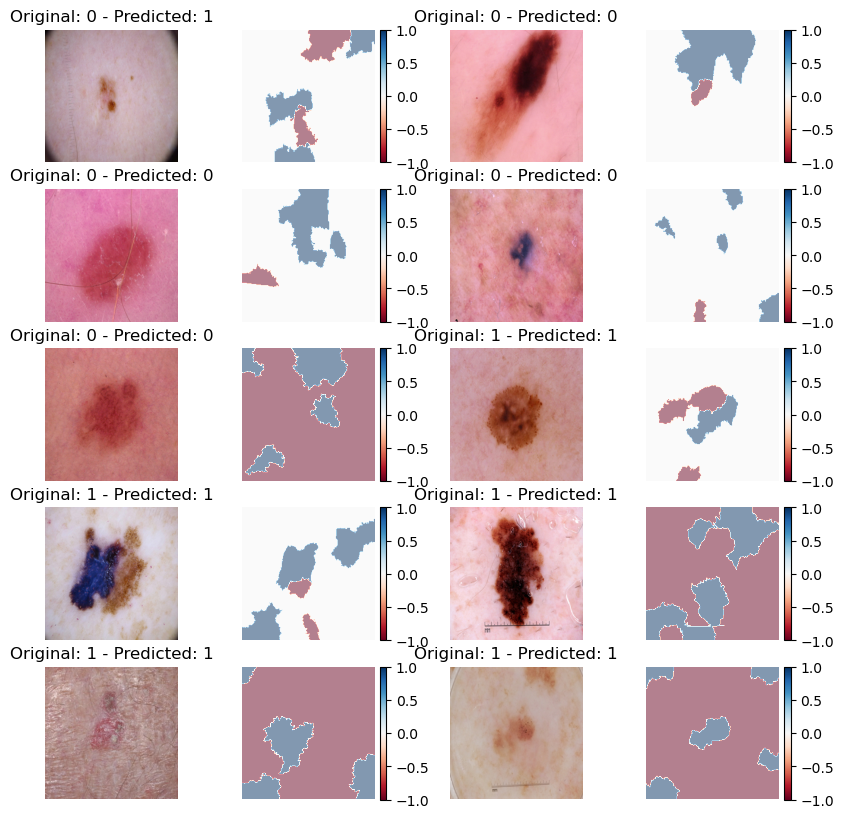

In [35]:
# Initialize the LIME Image Explainer
explainer = lime_image.LimeImageExplainer(verbose = False)

# Function to predict model on batches for LIME
def predict_fn(images):
    return vit_model.predict(images)

# Prepare figure for plotting
# fig, axs = plt.subplots(10, 2, figsize=(10, 40))
fig1, axs = plt.subplots(5, 4, figsize=(10, 10))  # Adjusted size for better display

# Process each image in the sampled dataset
for i, (images, labels) in enumerate(sampled_dataset.unbatch().take(10)):
    row = i // 2  # Each row contains pairs of image and heatmap
    col = (i % 2) * 2  # Calculate column index, alternating between starting points 0 and 2
    img = images.numpy()  # Convert TensorFlow tensor to numpy array
    img_batch = tf.expand_dims(images, axis=0).numpy()  # Add batch dimension for model prediction

    # Generate LIME explanation
    explanation = explainer.explain_instance(img, predict_fn, top_labels=5, hide_color=0, num_samples=1000)

    # Get image and mask for the top prediction
    top_label = explanation.top_labels[0]
    temp, mask = explanation.get_image_and_mask(top_label, positive_only=False, num_features=5, hide_rest=False)

    axs[row, col].imshow(images.numpy())
    true_label = np.argmax(labels.numpy())
    pred = vit_model.predict(img_batch)
    predicted_label = np.argmax(pred[0])
    axs[row, col].title.set_text(f'Original: {true_label} - Predicted: {predicted_label}')
    axs[row, col].axis('off')

    axs[row, col+1].imshow(mask,  cmap='RdBu', alpha=0.5)
    axs[row, col+1].axis('off')

    # Add colorbar to explain the heatmap intensity
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(axs[row, col+1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    mappable = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=-1, vmax=1))
    cbar = plt.colorbar(mappable, cax=cax, orientation='vertical')

fig1.savefig("C:/Users/ishan/OneDrive/Desktop/CV+PDL Miniproject/ViT_LIME.pdf")
# fig1.savefig("ViT_LIME.pdf")
plt.show()

### Attention mapping

In [36]:
def build_attention_model(base_model):
    # Define the input exactly like the base model's input
    input_layer = base_model.input

    # Define the outputs: the original model's output and attention weights from a chosen transformer block
    # We select the last block's attention weights for visualization
    final_output = base_model.output
    attention_weights = base_model.get_layer("Transformer/encoderblock_11").output[1]

    # Create a new model that outputs both the final predictions and the attention weights
    model_with_attention = Model(inputs=input_layer, outputs=[final_output, attention_weights])
    return model_with_attention

# Assuming 'vit_model' is your pre-loaded Vision Transformer model
vit_attention_model = build_attention_model(vit_model_16)

#### Attentions after first transformer block

1/1 [==============================] - 0s 328ms/step


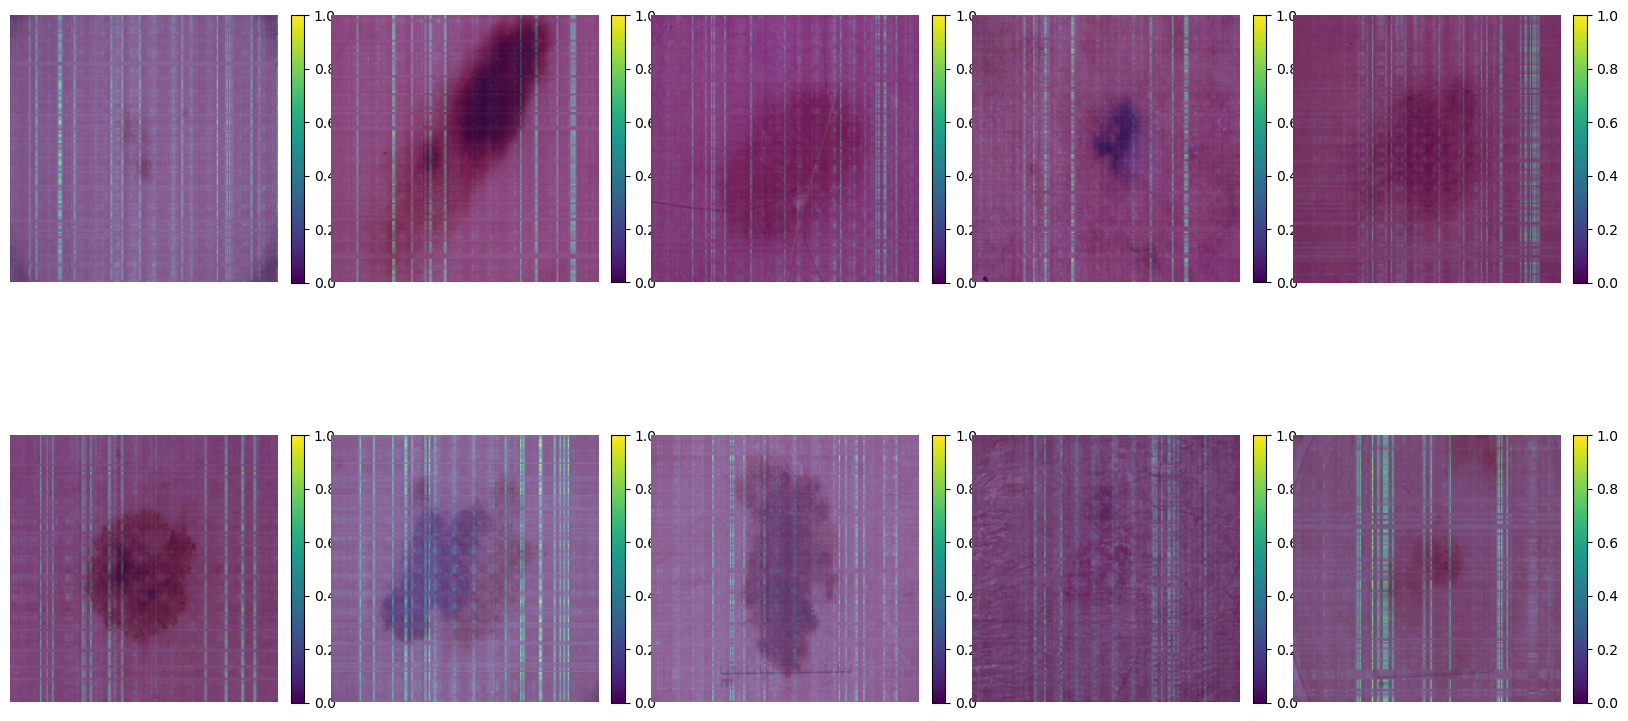

In [38]:
for images, labels in sampled_dataset.take(1):  # Process the first batch
    input_images = images.numpy()  

    # Predict and extract attention weights
    final_predictions, attention_weights = vit_attention_model.predict(input_images)

    fig2, axs = plt.subplots(2, 5, figsize=(20, 10))

    # Loop through each image in the batch
    for i in range(input_images.shape[0]):
        # Prepare the original image, normalize if needed
        original_image = input_images[i]
        if original_image.min() < 0 or original_image.max() > 1:
            original_image = (original_image + 1) / 2  # Normalize to [0, 1] if needed
        original_image = np.clip(original_image, 0, 1)  # Ensure values are within [0, 1]


        # Normalize the attention map
        attention_map = np.mean(attention_weights[i], axis=0)  # Average across all heads
        attention_map = (attention_map - np.min(attention_map)) / (np.max(attention_map) - np.min(attention_map))

        # Resize the attention map to match the original image size
        height, width, _ = original_image.shape
        attention_map_resized = resize(attention_map, (height, width), mode='reflect', anti_aliasing=True)

        # Create heatmap
        heatmap = np.uint8(255 * attention_map_resized)  # Convert to uint8
        heatmap = plt.cm.viridis(heatmap)[:, :, :3]  # Apply colormap by cutting off alpha channel

        # Overlay the heatmap onto the original image
        alpha = 0.6  # Define the transparency level
        overlayed_image = heatmap * alpha + original_image * (1 - alpha)

        row = i // 5
        col = i % 5
        ax = axs[row, col]
        im = ax.imshow(overlayed_image)
        ax.axis('off')  # Hide axes

        # Create a colorbar with the correct scale
        axins = ax.inset_axes([1.05, 0, 0.05, 1], transform=ax.transAxes)  
        mappable = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1))
        mappable.set_array([])
        cbar = plt.colorbar(mappable, cax=axins)

    fig2.savefig("C:/Users/ishan/OneDrive/Desktop/CV+PDL Miniproject/ViT_Attentions_0.pdf")
    plt.show()

#### Attentions after five transformer blocks

1/1 [==============================] - 0s 399ms/step


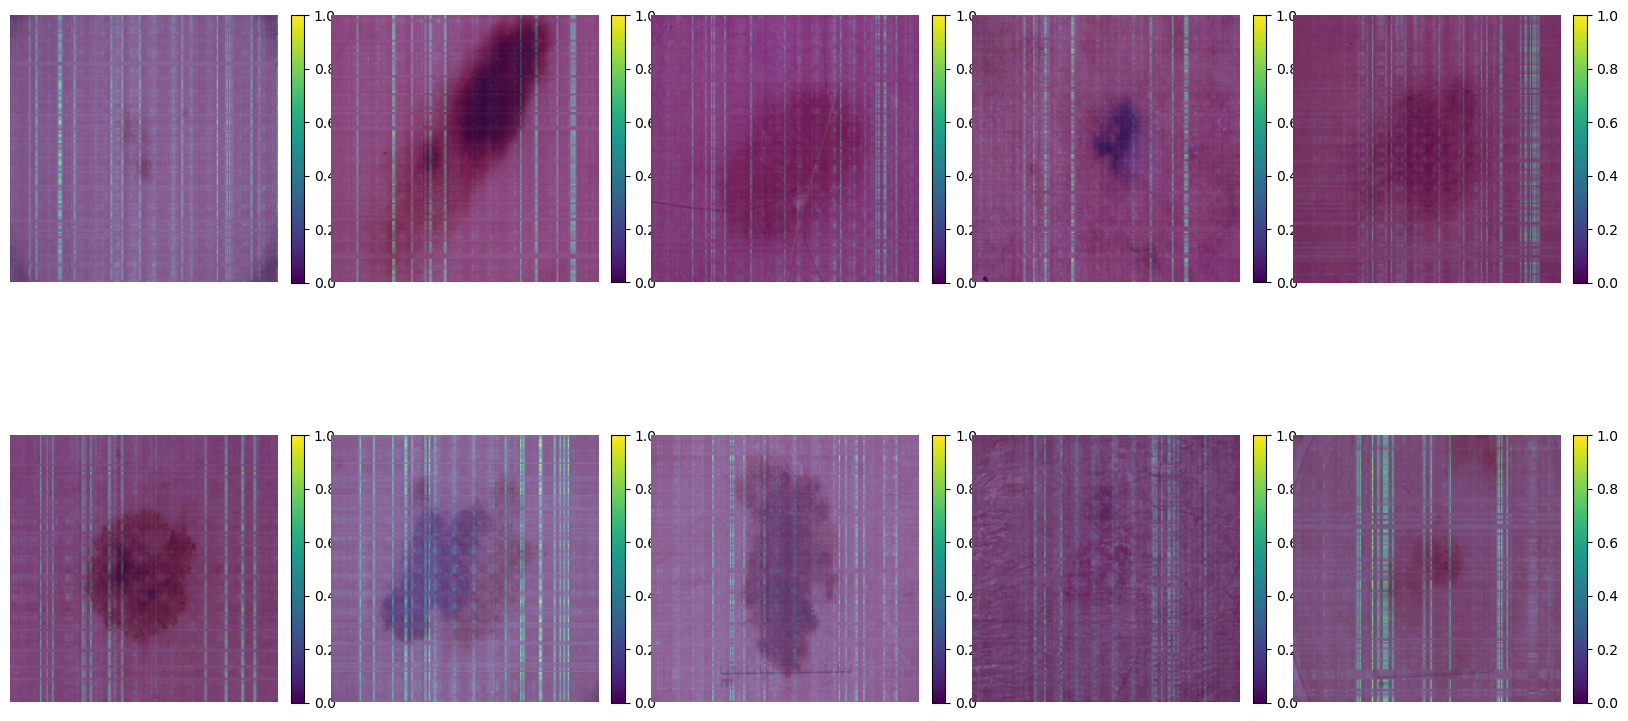

In [40]:
for images, labels in sampled_dataset.take(1):  # Process the first batch
    input_images = images.numpy()  

    # Predict and extract attention weights
    final_predictions, attention_weights = vit_attention_model.predict(input_images)

    fig2, axs = plt.subplots(2, 5, figsize=(20, 10))

    # Loop through each image in the batch
    for i in range(input_images.shape[0]):
        # Prepare the original image, normalize if needed
        original_image = input_images[i]
        if original_image.min() < 0 or original_image.max() > 1:
            original_image = (original_image + 1) / 2  # Normalize to [0, 1] if needed
        original_image = np.clip(original_image, 0, 1)  # Ensure values are within [0, 1]


        # Normalize the attention map
        attention_map = np.mean(attention_weights[i], axis=0)  # Average across all heads
        attention_map = (attention_map - np.min(attention_map)) / (np.max(attention_map) - np.min(attention_map))

        # Resize the attention map to match the original image size
        height, width, _ = original_image.shape
        attention_map_resized = resize(attention_map, (height, width), mode='reflect', anti_aliasing=True)

        # Create heatmap
        heatmap = np.uint8(255 * attention_map_resized)  # Convert to uint8
        heatmap = plt.cm.viridis(heatmap)[:, :, :3]  # Apply colormap by cutting off alpha channel

        # Overlay the heatmap onto the original image
        alpha = 0.6  # Define the transparency level
        overlayed_image = heatmap * alpha + original_image * (1 - alpha)

        row = i // 5
        col = i % 5
        ax = axs[row, col]
        im = ax.imshow(overlayed_image)
        ax.axis('off')  # Hide axes

        # Create a colorbar with the correct scale
        axins = ax.inset_axes([1.05, 0, 0.05, 1], transform=ax.transAxes)  
        mappable = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1))
        mappable.set_array([])
        cbar = plt.colorbar(mappable, cax=axins)

    fig2.savefig("C:/Users/ishan/OneDrive/Desktop/CV+PDL Miniproject/ViT_Attentions_5.pdf")
    plt.show()

#### Attentions at final transformer block

1/1 [==============================] - 0s 233ms/step


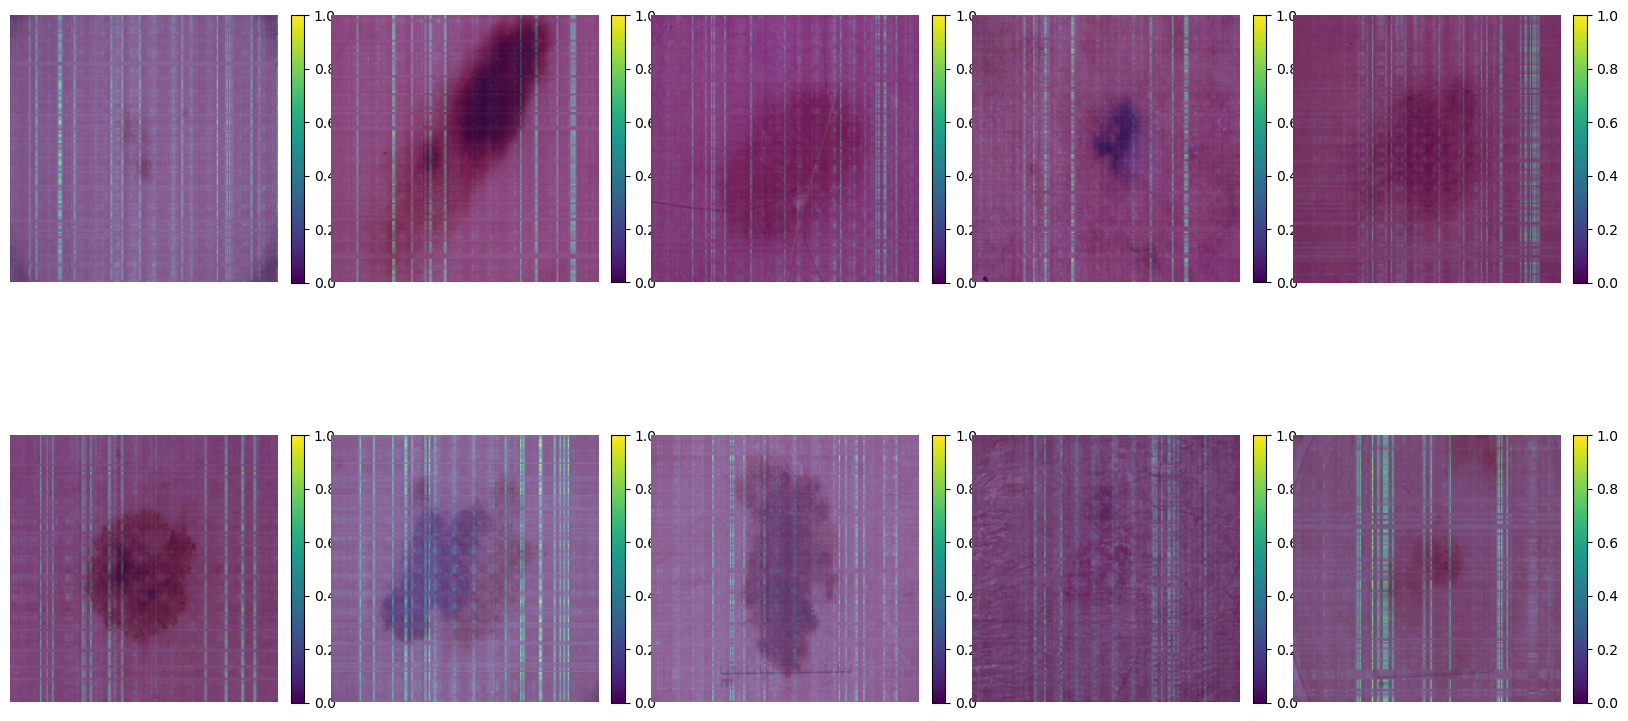

In [42]:
for images, labels in sampled_dataset.take(1):  # Process the first batch
    input_images = images.numpy()  

    # Predict and extract attention weights
    final_predictions, attention_weights = vit_attention_model.predict(input_images)

    fig2, axs = plt.subplots(2, 5, figsize=(20, 10))

    # Loop through each image in the batch
    for i in range(input_images.shape[0]):
        # Prepare the original image, normalize if needed
        original_image = input_images[i]
        if original_image.min() < 0 or original_image.max() > 1:
            original_image = (original_image + 1) / 2  # Normalize to [0, 1] if needed
        original_image = np.clip(original_image, 0, 1)  # Ensure values are within [0, 1]


        # Normalize the attention map
        attention_map = np.mean(attention_weights[i], axis=0)  # Average across all heads
        attention_map = (attention_map - np.min(attention_map)) / (np.max(attention_map) - np.min(attention_map))

        # Resize the attention map to match the original image size
        height, width, _ = original_image.shape
        attention_map_resized = resize(attention_map, (height, width), mode='reflect', anti_aliasing=True)

        # Create heatmap
        heatmap = np.uint8(255 * attention_map_resized)  # Convert to uint8
        heatmap = plt.cm.viridis(heatmap)[:, :, :3]  # Apply colormap by cutting off alpha channel

        # Overlay the heatmap onto the original image
        alpha = 0.6  # Define the transparency level
        overlayed_image = heatmap * alpha + original_image * (1 - alpha)

        row = i // 5
        col = i % 5
        ax = axs[row, col]
        im = ax.imshow(overlayed_image)
        ax.axis('off')  # Hide axes

        # Create a colorbar with the correct scale
        axins = ax.inset_axes([1.05, 0, 0.05, 1], transform=ax.transAxes) 
        mappable = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1))
        mappable.set_array([])
        cbar = plt.colorbar(mappable, cax=axins)

    fig2.savefig("C:/Users/ishan/OneDrive/Desktop/CV+PDL Miniproject/ViT_Attentions_final.pdf")
    plt.show()

In [7]:
import numpy as np
import cv2
from PIL import Image
from sklearn.cluster import KMeans
from vit_keras import vit
from keras.models import Model
import tensorflow as tf

# Load base ViT model
vit_base = vit.vit_b16(image_size=224, pretrained=True, include_top=False, pretrained_top=False, classes=2)

def extract_color_info(image, n_clusters=3):
    pixels = image.reshape(-1, 3)
    
    # Retry if very few pixels remain (less than 10)
    if pixels.shape[0] < 10:
        return ["not enough focus"], [0]

    try:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(pixels)
        centers = kmeans.cluster_centers_.astype(int)

        def color_name(rgb):
            r, g, b = rgb
            if r > 150 and g < 100 and b < 100:
                return "reddish"
            elif r < 100 and g > 150 and b < 100:
                return "greenish"
            elif r < 100 and g < 100 and b > 150:
                return "bluish"
            elif r > 200 and g > 200 and b > 200:
                return "light"
            elif r < 80 and g < 80 and b < 80:
                return "dark"
            else:
                return "mixed"

        return [color_name(c) for c in centers]
    except:
        return ["unable to determine"], [0]


    color_descriptions = [color_name(c) for c in dominant_colors]
    return color_descriptions, counts[sorted_indices]

def extract_texture_info(gray_image):
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
    variance = laplacian.var()
    if variance < 10:
        return "smooth"
    elif variance < 50:
        return "slightly textured"
    else:
        return "highly textured"

def get_region_size(attention_map, threshold=0.6):
    mask = attention_map > threshold
    size_ratio = np.sum(mask) / mask.size
    if size_ratio < 0.05:
        return "very small"
    elif size_ratio < 0.15:
        return "moderate"
    else:
        return "large"

def get_attention_map(image_array):
    input_layer = vit_base.input
    output_layer = vit_base.get_layer("Transformer/encoderblock_11").output[1]
    attention_model = Model(inputs=input_layer, outputs=output_layer)
    image_batch = np.expand_dims(image_array, axis=0)
    attention_weights = attention_model.predict(image_batch)[0]
    attention_map = np.mean(attention_weights, axis=0)
    attention_map = attention_map[0, 1:]
    return attention_map.reshape(14, 14)

def generate_detailed_explanation(image_array, attention_map):
    image_uint8 = (image_array * 255).astype(np.uint8)
    gray = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2GRAY)
    attention_map_resized = cv2.resize(attention_map, (224, 224))
    mask = attention_map_resized > 0.6
    focused_region = image_uint8 * mask[..., np.newaxis]
    focused_pixels = focused_region[mask]

    color_descs, _ = extract_color_info(focused_pixels)
    texture_desc = extract_texture_info(gray * mask)
    size_desc = get_region_size(attention_map_resized)

    y, x = np.unravel_index(np.argmax(attention_map), attention_map.shape)
    vert = "top" if y < 4 else "central" if y < 9 else "bottom"
    horiz = "left" if x < 4 else "center" if x < 9 else "right"
    position = f"{vert}-{horiz}"

    explanation = (
        f"The model focused on a {size_desc} region with {texture_desc} texture. "
        f"The dominant colors in the region appear to be {', '.join(color_descs)}. "
        f"This region lies in the {position} part of the image."
    )
    return explanation

# ==== Load image ====
img_path = "C:/Users/ishan/OneDrive/Desktop/CV+PDL Miniproject/data/test/malignant/1.jpg"
img = Image.open(img_path).resize((224, 224))
img_arr = np.array(img) / 255.0
if img_arr.shape[-1] == 4:
    img_arr = img_arr[..., :3]

# ==== Generate full explanation ====
attention_map = get_attention_map(img_arr)
detailed_sentence = generate_detailed_explanation(img_arr, attention_map)
print("Explanation:", detailed_sentence)

1/1 [==============================] - 2s 2s/step
Explanation: The model focused on a very small region with smooth texture. The dominant colors in the region appear to be not enough focus. This region lies in the central-left part of the image.


In [4]:
from tensorflow.keras.models import load_model

# Load trained model
vit_model = load_model("vit_model_skin_cancer.h5")

# Predict class
img_batch = np.expand_dims(img_arr, axis=0)
preds = vit_model.predict(img_batch)[0]
pred_class = np.argmax(preds)
label = "Malignant" if pred_class == 1 else "Benign"

# Final Output
print(f"Prediction: {label}")
print(sentence)


1/1 [==============================] - 2s 2s/step
Prediction: Malignant
The model focused on the central-left region.


In [1]:
import gradio as gr
import tensorflow as tf
from vit_keras import vit
from keras.models import Model
import numpy as np
from PIL import Image
import cv2
from sklearn.cluster import KMeans

# === Load ViT model ===
vit_model = tf.keras.models.load_model("vit_model_skin_cancer.h5")
vit_base = vit.vit_b16(image_size=224, pretrained=True, include_top=False, pretrained_top=False, classes=2)

# === XAI Utility Functions ===
def extract_color_info(image, n_clusters=3):
    pixels = image.reshape(-1, 3)
    if pixels.shape[0] == 0:
        return ["unknown"]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(pixels)
    centers = kmeans.cluster_centers_.astype(int)
    def color_name(rgb):
        r, g, b = rgb
        if r > 150 and g < 100 and b < 100: return "reddish"
        if r < 100 and g > 150 and b < 100: return "greenish"
        if r < 100 and g < 100 and b > 150: return "bluish"
        if r > 200 and g > 200 and b > 200: return "light"
        if r < 80 and g < 80 and b < 80: return "dark"
        return "mixed"
    return [color_name(c) for c in centers]

def extract_texture_info(gray_img):
    lap = cv2.Laplacian(gray_img, cv2.CV_64F)
    var = lap.var()
    if var < 10: return "smooth"
    elif var < 50: return "slightly textured"
    else: return "highly textured"

def get_region_size(att_map, threshold=0.6):
    mask = att_map > threshold
    ratio = np.sum(mask) / att_map.size
    if ratio < 0.05: return "very small"
    elif ratio < 0.15: return "moderate"
    else: return "large"

def get_attention_map(image_array):
    attention_model = Model(inputs=vit_base.input,
                            outputs=vit_base.get_layer("Transformer/encoderblock_11").output[1])
    image_batch = np.expand_dims(image_array, axis=0)
    attn_weights = attention_model.predict(image_batch)[0]
    attn_map = np.mean(attn_weights, axis=0)[0, 1:]  # remove CLS token
    return attn_map.reshape(14, 14)

def generate_detailed_explanation(image_array, attn_map):
    image_uint8 = (image_array * 255).astype(np.uint8)
    gray = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2GRAY)
    attn_resized = cv2.resize(attn_map, (224, 224))
    mask = attn_resized > 0.6
    focused = image_uint8 * mask[..., np.newaxis]
    focused_pixels = focused[mask]

    colors = extract_color_info(focused_pixels)
    texture = extract_texture_info(gray * mask)
    size = get_region_size(attn_resized)
    y, x = np.unravel_index(np.argmax(attn_map), attn_map.shape)
    pos = f"{'top' if y<4 else 'central' if y<9 else 'bottom'}-{'left' if x<4 else 'center' if x<9 else 'right'}"

    return f"The model focused on a {size} region with {texture} texture. " \
           f"The dominant colors in the region appear to be {', '.join(colors)}. " \
           f"This region lies in the {pos} part of the image."

# === Prediction + Explanation ===
def predict_image(image):
    image = Image.fromarray(image).resize((224, 224))
    img_array = np.array(image) / 255.0
    if img_array.shape[-1] == 4:
        img_array = img_array[..., :3]

    preds = vit_model.predict(np.expand_dims(img_array, axis=0))[0]
    pred_class = np.argmax(preds)
    conf = round(np.max(preds) * 100, 2)
    label = "Malignant" if pred_class == 1 else "Benign"

    att_map = get_attention_map(img_array)
    explanation = generate_detailed_explanation(img_array, att_map)

    return f"Prediction: {label} ({conf}% confidence)\n\n{explanation}"

# === Gradio Interface ===
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="numpy"),
    outputs="text",
    title="Skin Cancer Detector with Explainability",
    description="Upload a skin lesion image. The model classifies it as benign or malignant and explains what region it focused on."
)

interface.launch()


c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above o

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\gradio\analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.44.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(
